<h1>MUSIC AND MENTAL HEALTH</h1>

<h2>Librarys</h2>

In [488]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import tree
from subprocess import check_call, CalledProcessError
import matplotlib.image as mpimg

<h3>Data Wrangling</h3>

In [489]:
df = pd.read_csv('mxmh_survey_results.csv',sep=';')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [490]:
df.replace("?",np.nan, inplace=True)
df.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [491]:
missing_data = df.isnull()
missing_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [492]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Timestamp
Timestamp
False    736
Name: count, dtype: int64

Age
Age
False    735
True       1
Name: count, dtype: int64

Primary streaming service
Primary streaming service
False    735
True       1
Name: count, dtype: int64

Hours per day
Hours per day
False    736
Name: count, dtype: int64

While working
While working
False    733
True       3
Name: count, dtype: int64

Instrumentalist
Instrumentalist
False    732
True       4
Name: count, dtype: int64

Composer
Composer
False    735
True       1
Name: count, dtype: int64

Fav genre
Fav genre
False    736
Name: count, dtype: int64

Exploratory
Exploratory
False    736
Name: count, dtype: int64

Foreign languages
Foreign languages
False    732
True       4
Name: count, dtype: int64

BPM
BPM
False    629
True     107
Name: count, dtype: int64

Frequency [Classical]
Frequency [Classical]
False    736
Name: count, dtype: int64

Frequency [Country]
Frequency [Country]
False    736
Name: count, dtype: int64

Frequency [EDM]
Frequency [EDM]

In [493]:
df.dropna(subset=["Age"],axis=0,inplace=True)


In [494]:
df.dropna(subset=["Primary streaming service"],axis=0,inplace=True)
df.dropna(subset=["While working"],axis=0,inplace=True)
df.dropna(subset=["Instrumentalist"],axis=0,inplace=True)
df.dropna(subset=["Composer"],axis=0,inplace=True)
df.dropna(subset=["Foreign languages"],axis=0,inplace=True)
df.dropna(subset=["Music effects"],axis=0,inplace=True)

In [495]:
df['BPM'] = df.groupby('Fav genre')['BPM'].transform(lambda x: x.fillna(x.mean()))

In [496]:
missing_data2 = df.isnull()

In [497]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print(missing_data2[column].value_counts())
    print("")

Timestamp
Timestamp
False    718
Name: count, dtype: int64

Age
Age
False    718
Name: count, dtype: int64

Primary streaming service
Primary streaming service
False    718
Name: count, dtype: int64

Hours per day
Hours per day
False    718
Name: count, dtype: int64

While working
While working
False    718
Name: count, dtype: int64

Instrumentalist
Instrumentalist
False    718
Name: count, dtype: int64

Composer
Composer
False    718
Name: count, dtype: int64

Fav genre
Fav genre
False    718
Name: count, dtype: int64

Exploratory
Exploratory
False    718
Name: count, dtype: int64

Foreign languages
Foreign languages
False    718
Name: count, dtype: int64

BPM
BPM
False    718
Name: count, dtype: int64

Frequency [Classical]
Frequency [Classical]
False    718
Name: count, dtype: int64

Frequency [Country]
Frequency [Country]
False    718
Name: count, dtype: int64

Frequency [EDM]
Frequency [EDM]
False    718
Name: count, dtype: int64

Frequency [Folk]
Frequency [Folk]
False    718
Nam

In [498]:
df.reset_index(drop=True, inplace=True)
df["BPM"] = df["BPM"].astype(int)
df["BPM"].head(20)

0     132
1      84
2     107
3      86
4      66
5      95
6      94
7     155
8     111
9     125
10     88
11    148
12    118
13    103
14    120
15     99
16    120
17    120
18    125
19    118
Name: BPM, dtype: int32

In [499]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [500]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                               int32
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [501]:
df[["Age","Anxiety","Depression","Insomnia","OCD"]] = df[["Age","Anxiety","Depression","Insomnia","OCD"]].astype("int")

In [502]:
df.dtypes

Timestamp                        object
Age                               int32
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                               int32
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [503]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
1,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
2,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
3,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.
4,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4,8,6,0,Improve,I understand.


In [504]:
#Haré bins para clasificar la edad y mirar más adelante si según un rango de edad hay efectos

bins = [5,11,17,26,59,120]
clasificacion_edad = ['Infante','Adolescente','Jóven','Adulto','Viejo']

df['Age-binned']=pd.cut(df['Age'],bins,labels=clasificacion_edad,include_lowest=True)
df[['Age','Age-binned']].head(20)

,Age,Age-binned
0,18,Jóven
1,61,Viejo
2,18,Jóven
3,18,Jóven
4,18,Jóven
5,21,Jóven
6,19,Jóven
7,18,Jóven
8,18,Jóven
9,19,Jóven


In [505]:
df['Age-binned'].value_counts()

Age-binned
Jóven          369
Adulto         174
Adolescente    149
Viejo           25
Infante          1
Name: count, dtype: int64

Text(0.5, 1.0, 'Age bins')

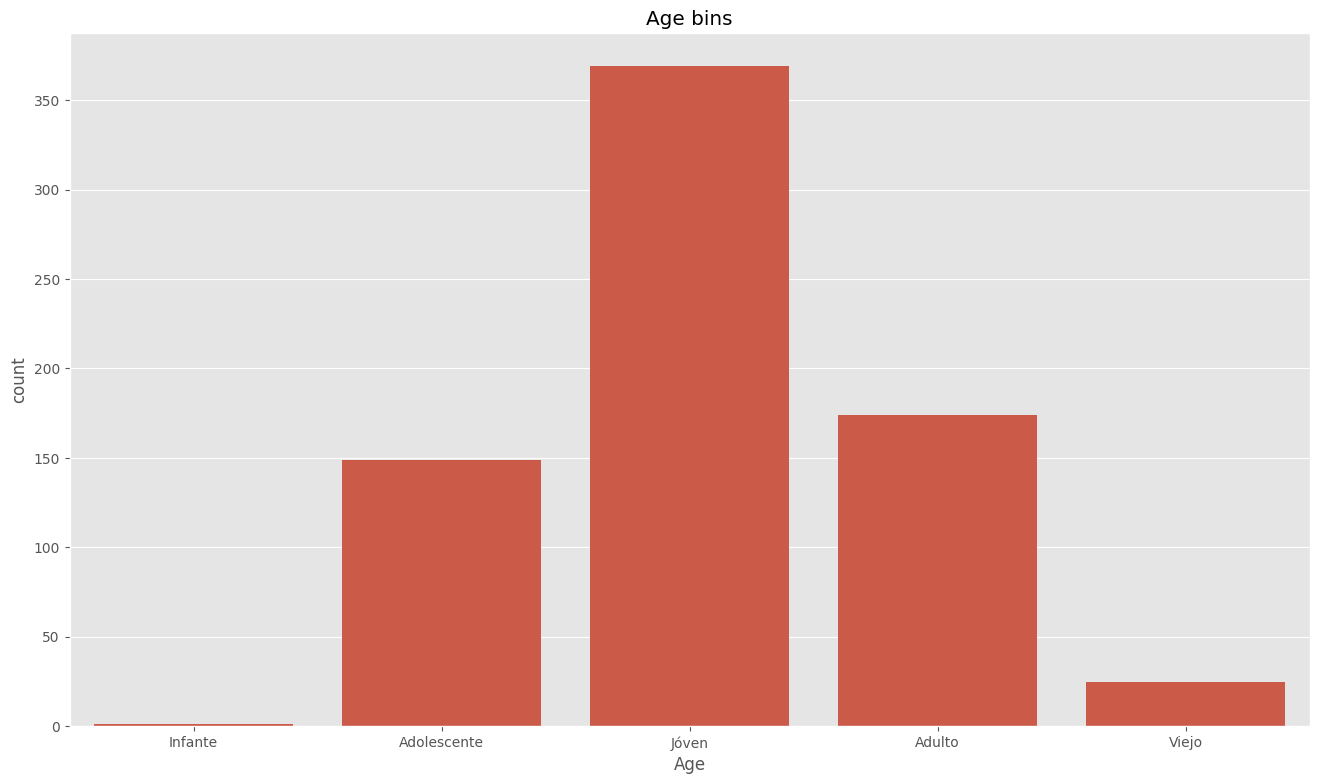

In [506]:
sns.barplot(df['Age-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age bins")

In [507]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.663695e+06,5.837047,4.805014,3.717270,2.633705
std,11.953918,3.017779,3.740938e+07,2.784179,3.020779,3.084493,2.842363
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [508]:
df[['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']].corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.038877,-0.032020,-0.186996,-0.116652,0.009188,-0.132481
Hours per day,-0.038877,1.000000,0.037455,0.045447,0.097400,0.135532,0.113677
BPM,-0.032020,0.037455,1.000000,-0.031614,0.037500,0.045043,0.014119
Anxiety,-0.186996,0.045447,-0.031614,1.000000,0.520407,0.282085,0.343341
Depression,-0.116652,0.097400,0.037500,0.520407,1.000000,0.376071,0.186106
Insomnia,0.009188,0.135532,0.045043,0.282085,0.376071,1.000000,0.224088
OCD,-0.132481,0.113677,0.014119,0.343341,0.186106,0.224088,1.000000


In [509]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age-binned
0,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.,Jóven
1,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9,7,3,3,Improve,I understand.,Viejo
2,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.,Jóven
3,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.,Jóven
4,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Never,Never,Sometimes,4,8,6,0,Improve,I understand.,Jóven


In [510]:
dummy_variable = pd.get_dummies(df['Primary streaming service'])
dummy_variable.head()

,Apple Music,I do not use a streaming service.,Other streaming service,Pandora,Spotify,YouTube Music
0,False,False,False,False,True,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


<h3>EDA</h3>

In [511]:
df['Fav genre'].value_counts()

Fav genre
Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
Name: count, dtype: int64

<Axes: xlabel='Fav genre', ylabel='Anxiety'>

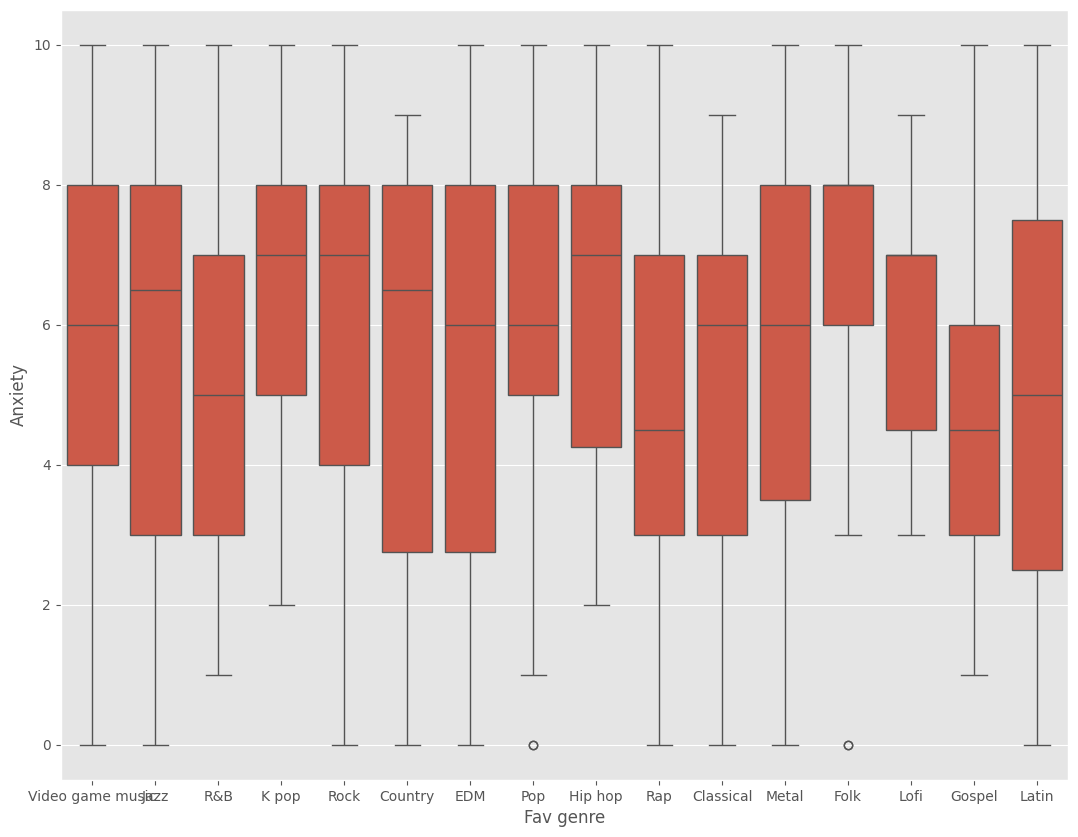

In [512]:
#Categorical Variables
pyplot.figure(figsize=(13,10))
sns.boxplot(x="Fav genre",y="Anxiety",data=df)

<Axes: xlabel='Fav genre', ylabel='Depression'>

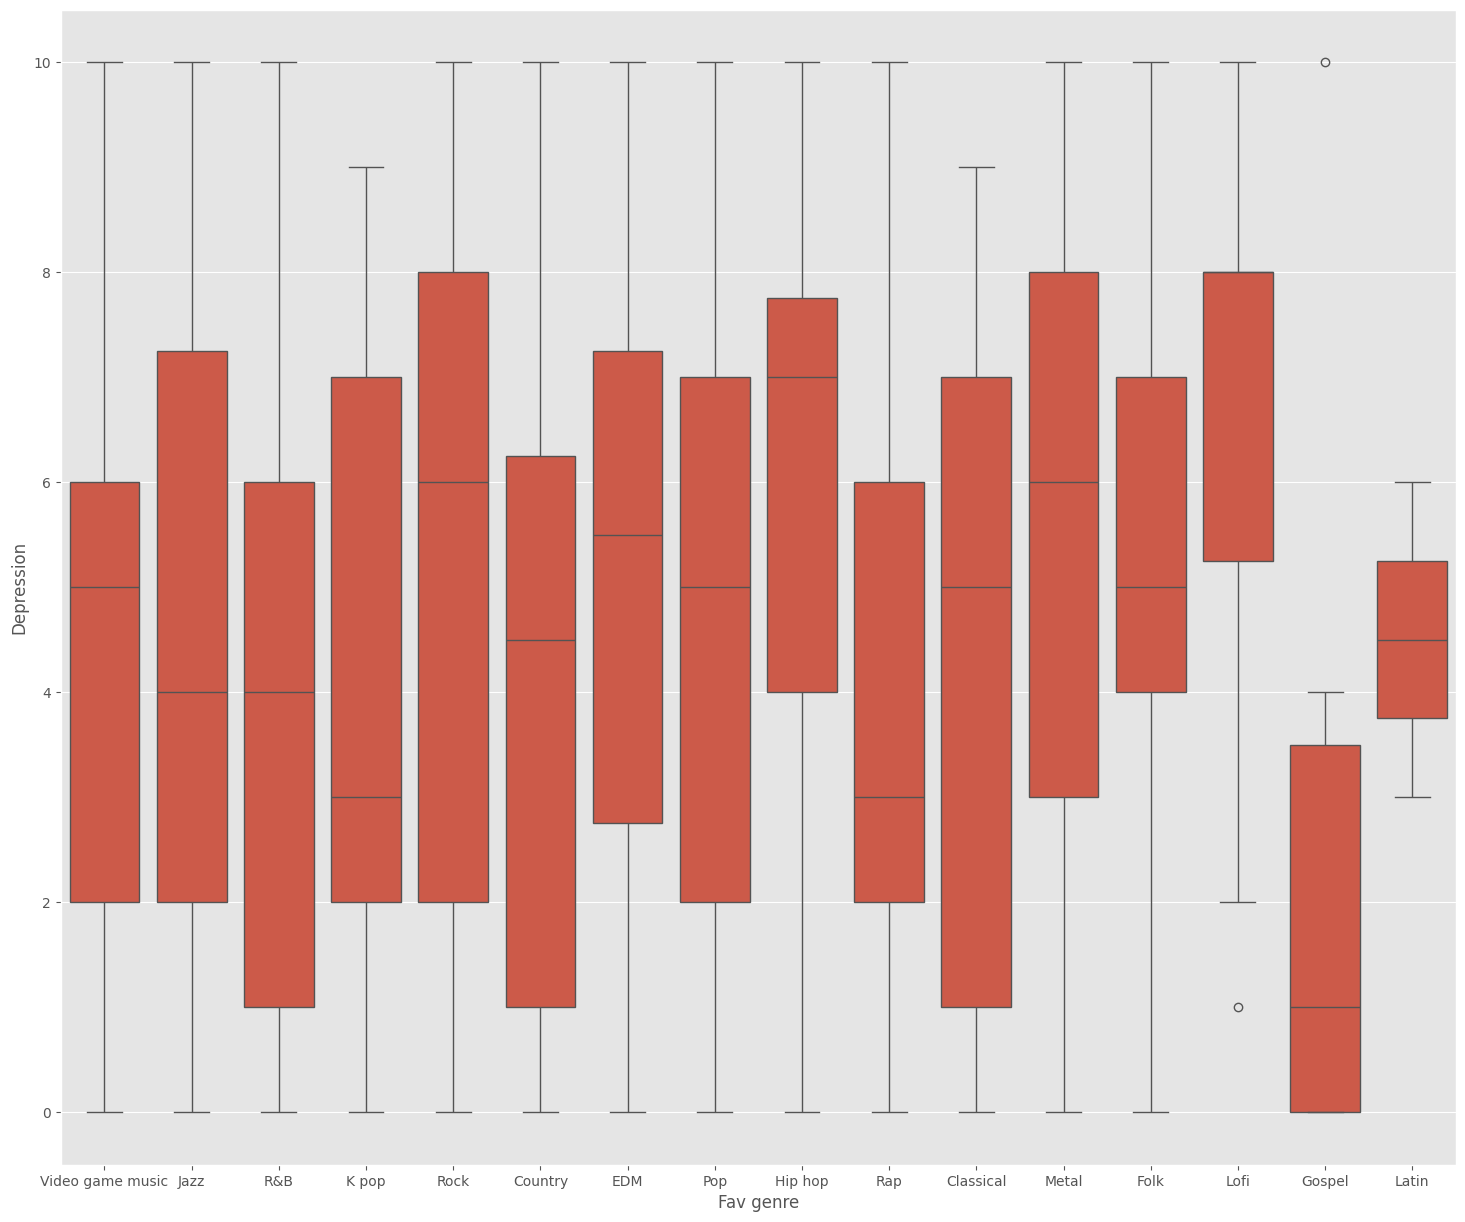

In [513]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x="Fav genre",y="Depression",data=df)

<Axes: xlabel='Fav genre', ylabel='Insomnia'>

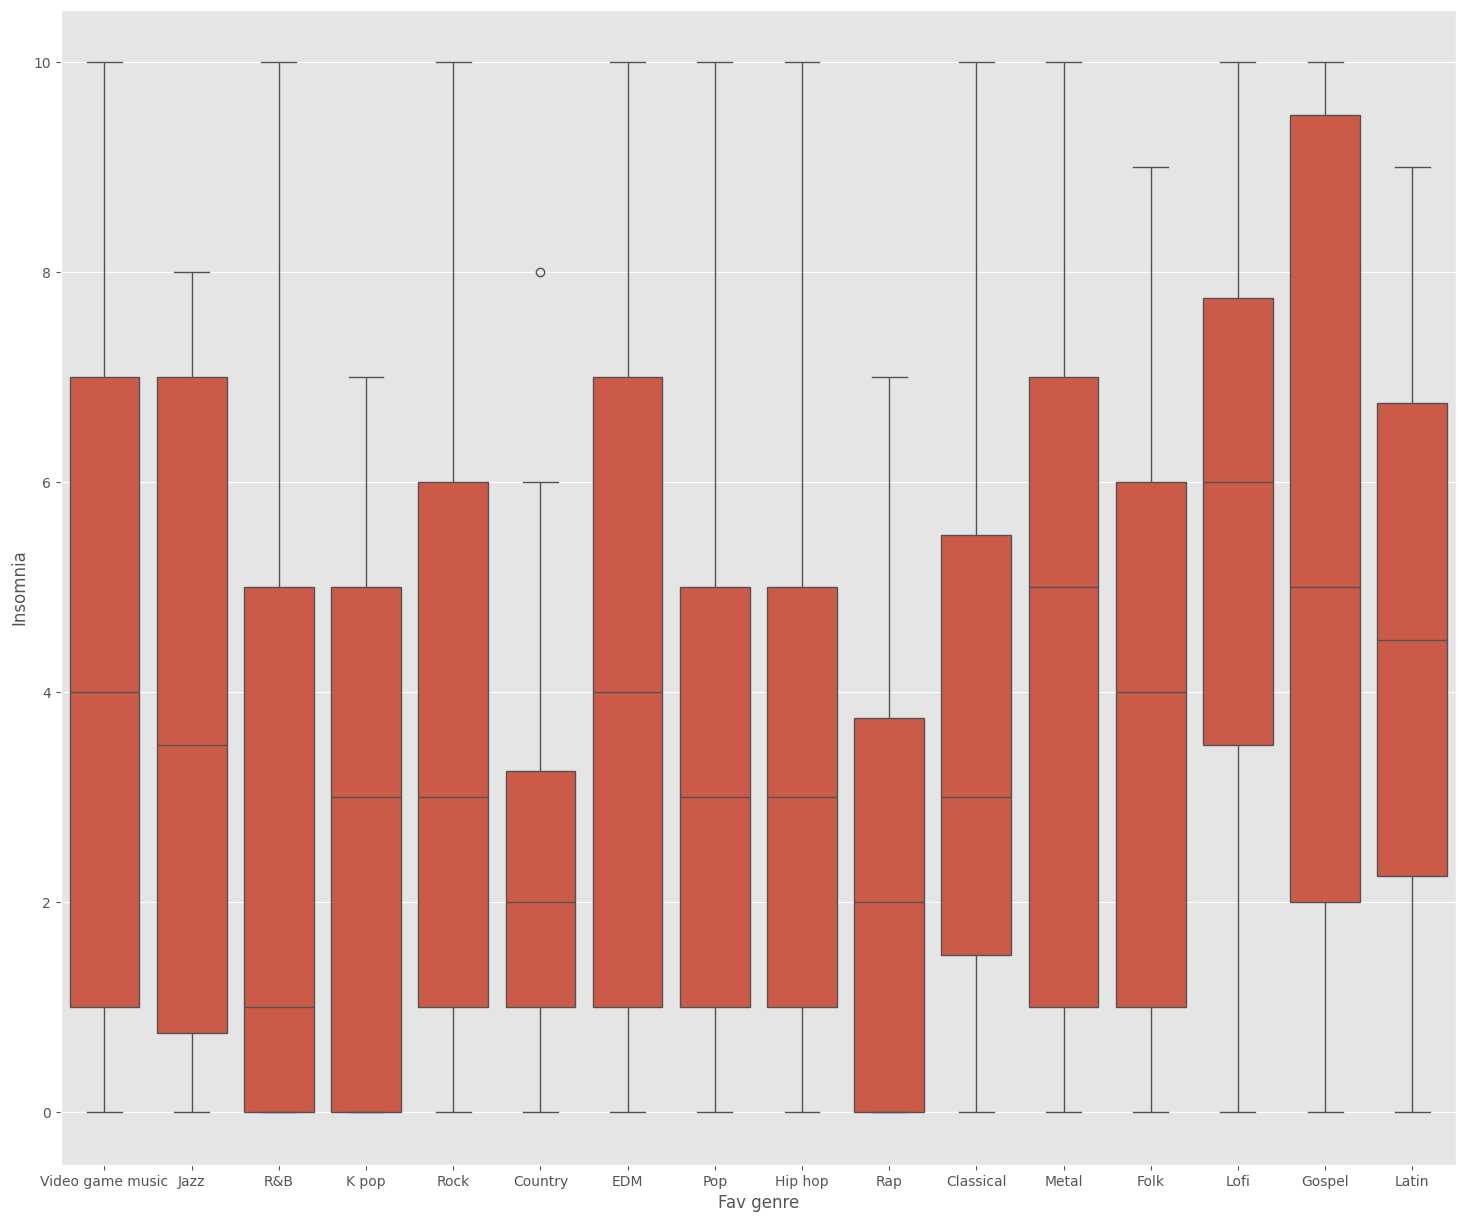

In [514]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x="Fav genre",y="Insomnia",data=df)

<Axes: xlabel='Fav genre', ylabel='OCD'>

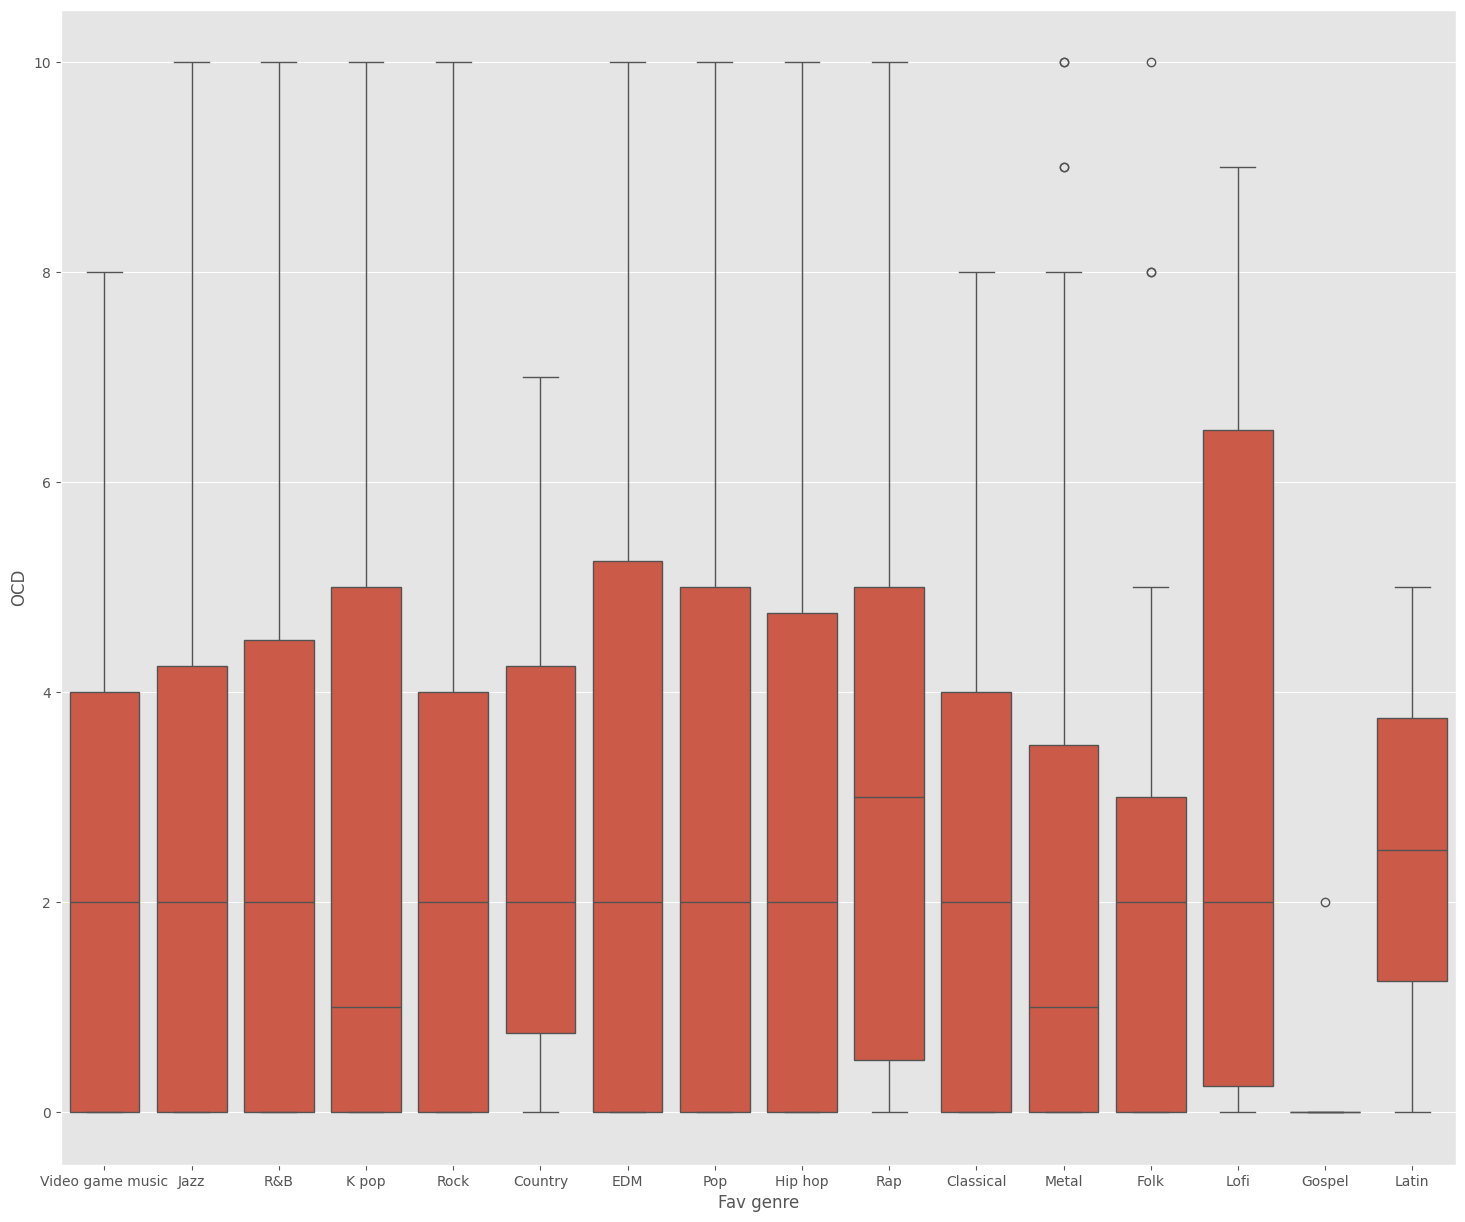

In [515]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x="Fav genre",y="OCD",data=df)

<Axes: xlabel='Frequency [Rock]', ylabel='Anxiety'>

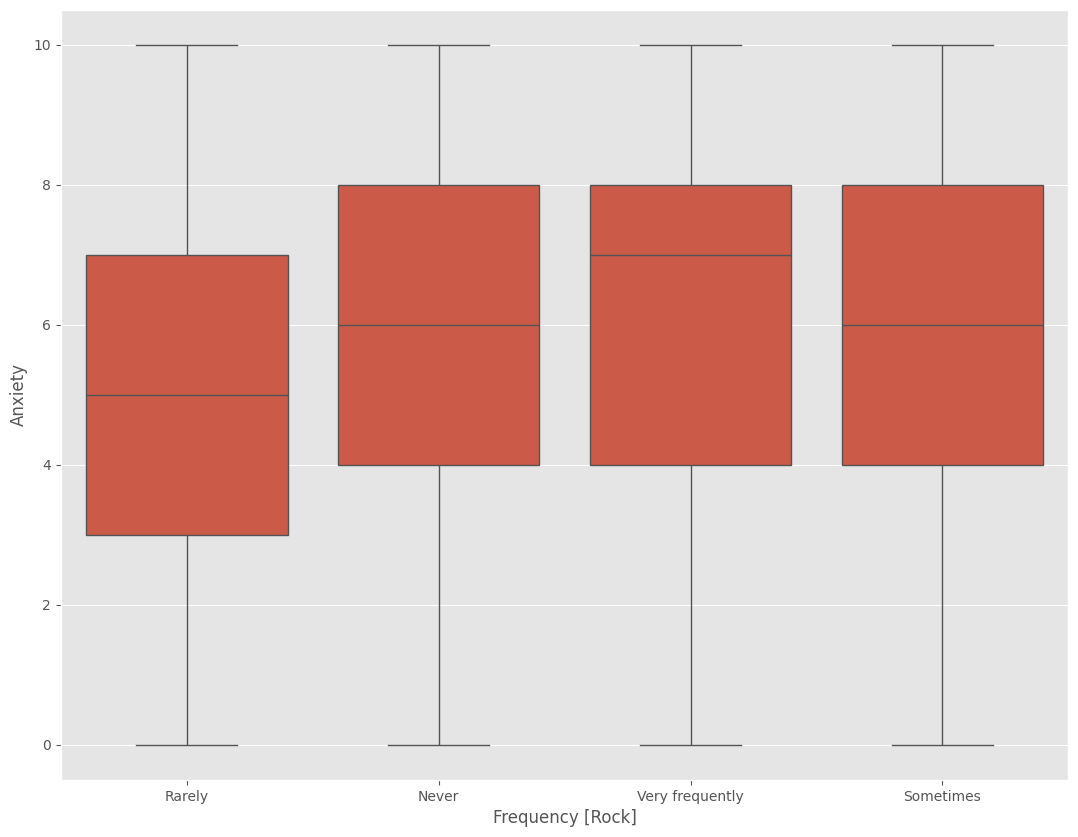

In [516]:
pyplot.figure(figsize=(13,10))
sns.boxplot(x='Frequency [Rock]', y='Anxiety',data=df)

<Axes: xlabel='Frequency [Rock]', ylabel='Depression'>

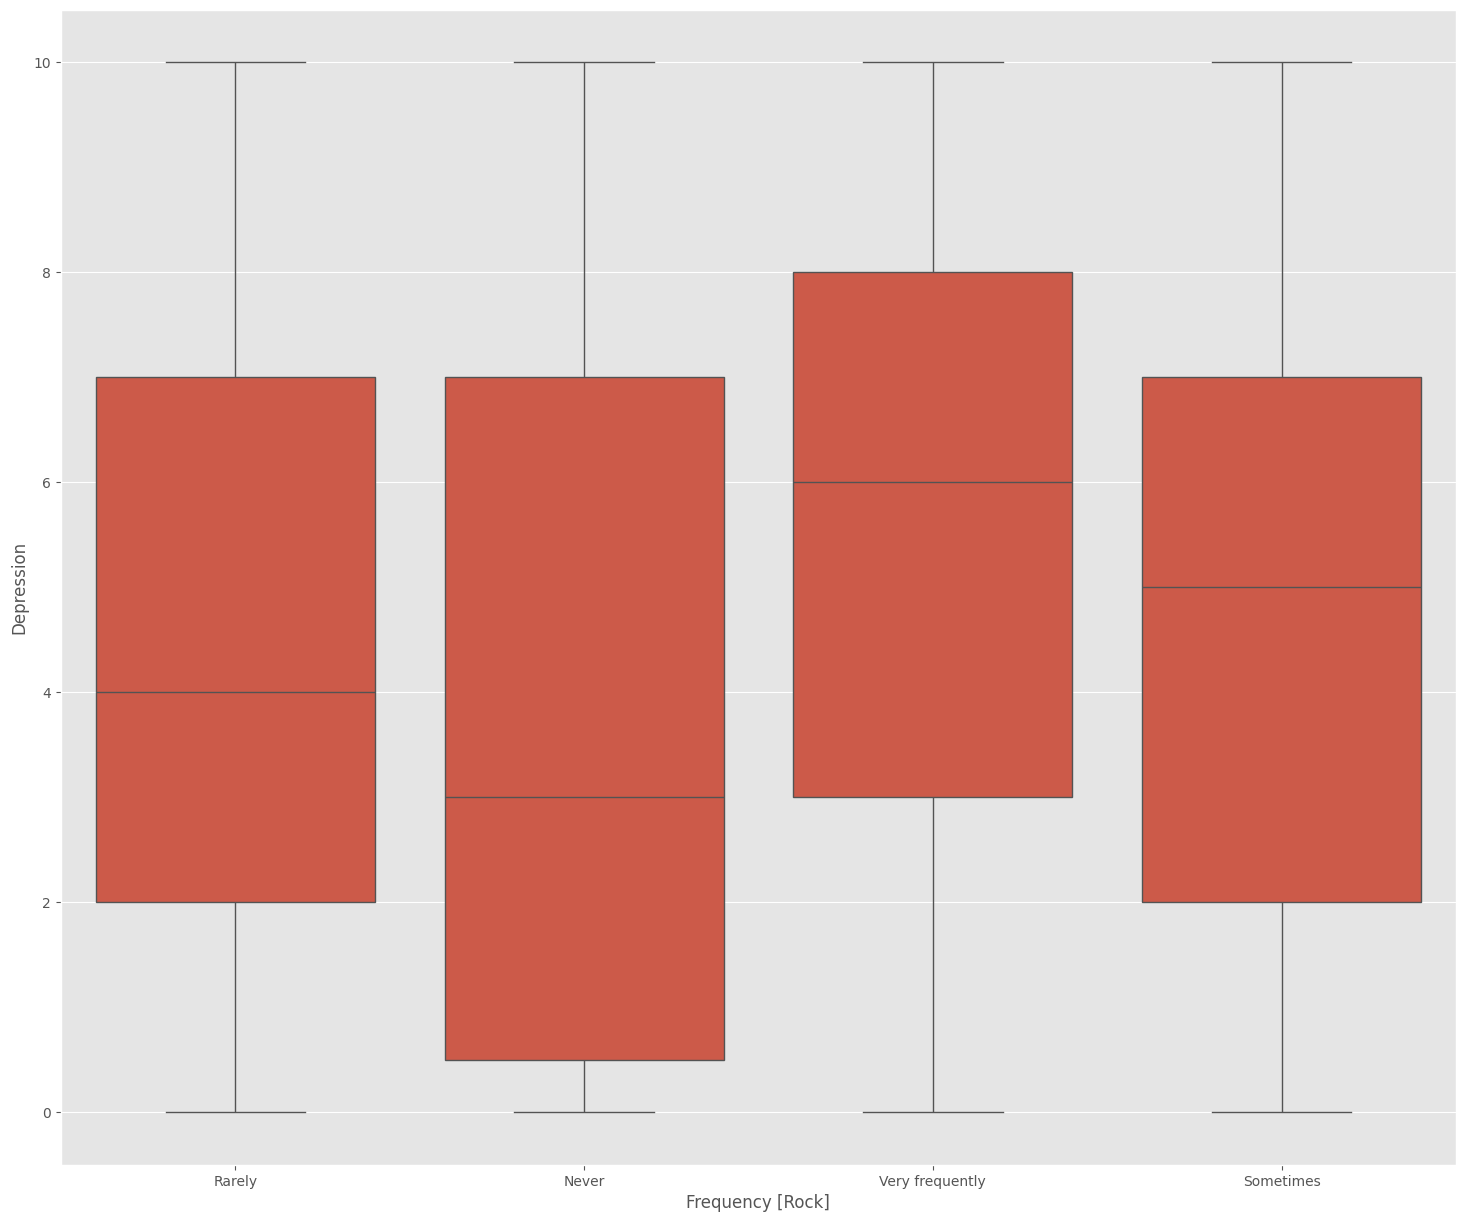

In [517]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x='Frequency [Rock]', y='Depression',data=df)

<Axes: xlabel='Frequency [Rock]', ylabel='Insomnia'>

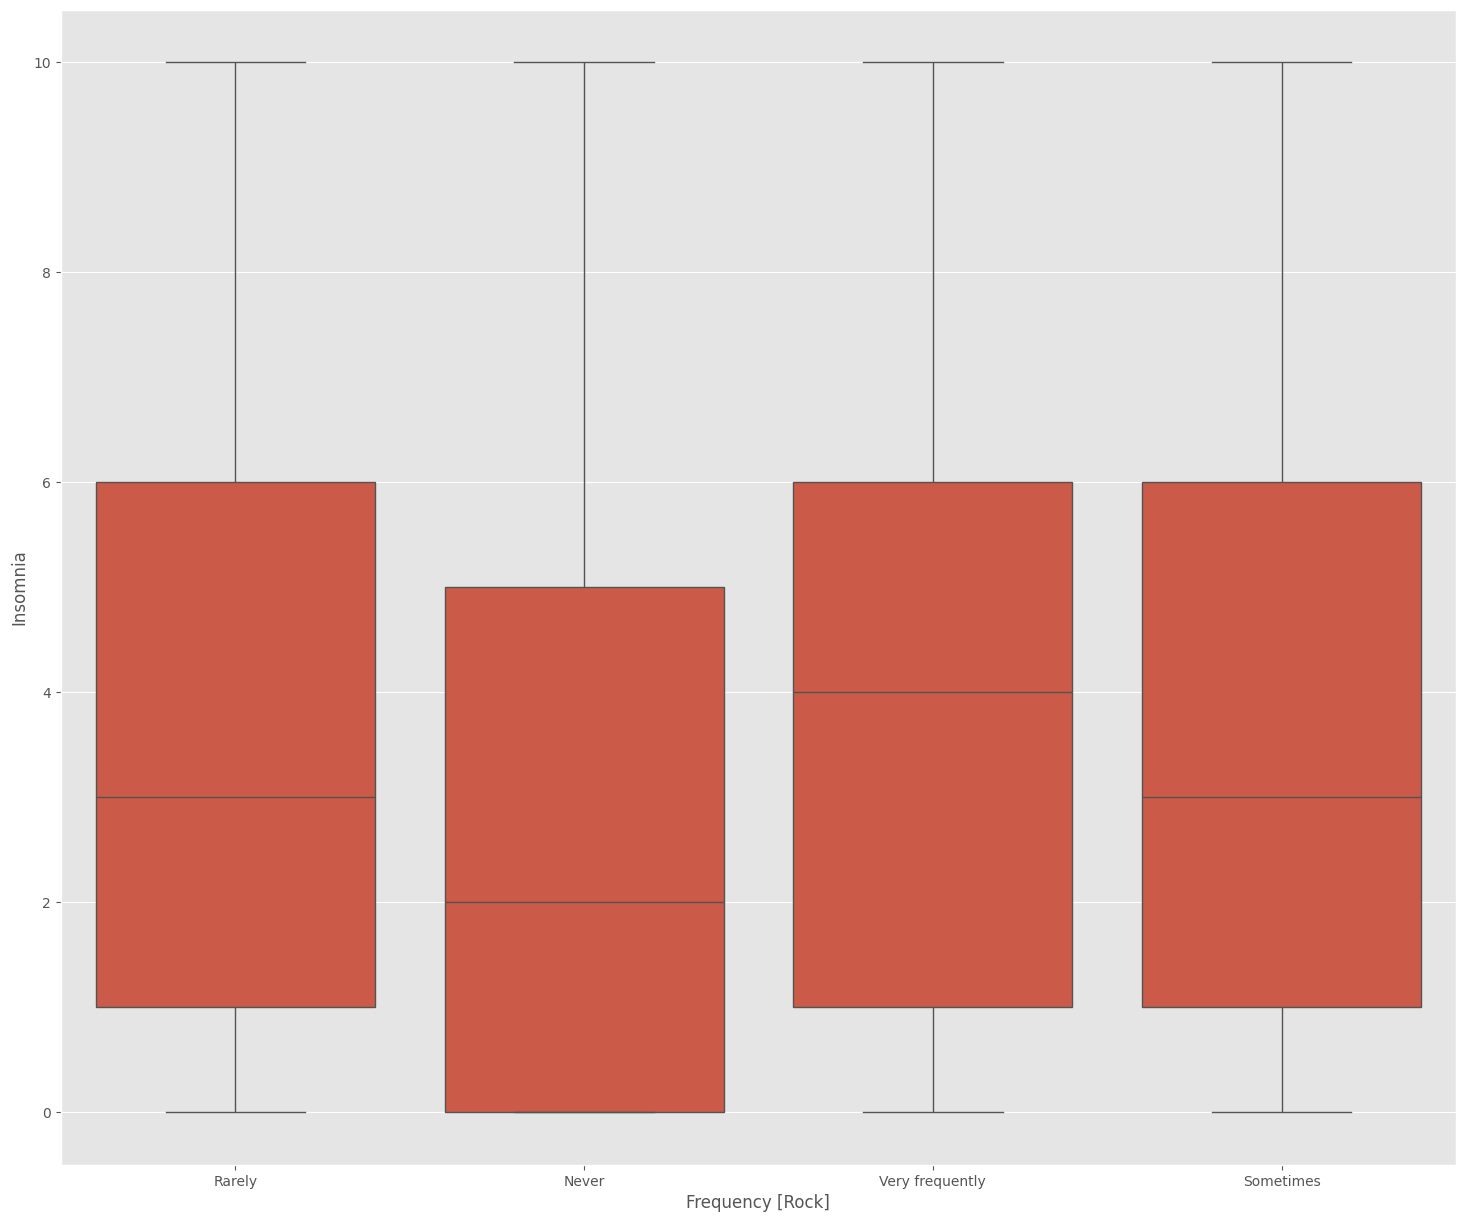

In [518]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x='Frequency [Rock]', y='Insomnia',data=df)

<Axes: xlabel='Frequency [Rock]', ylabel='OCD'>

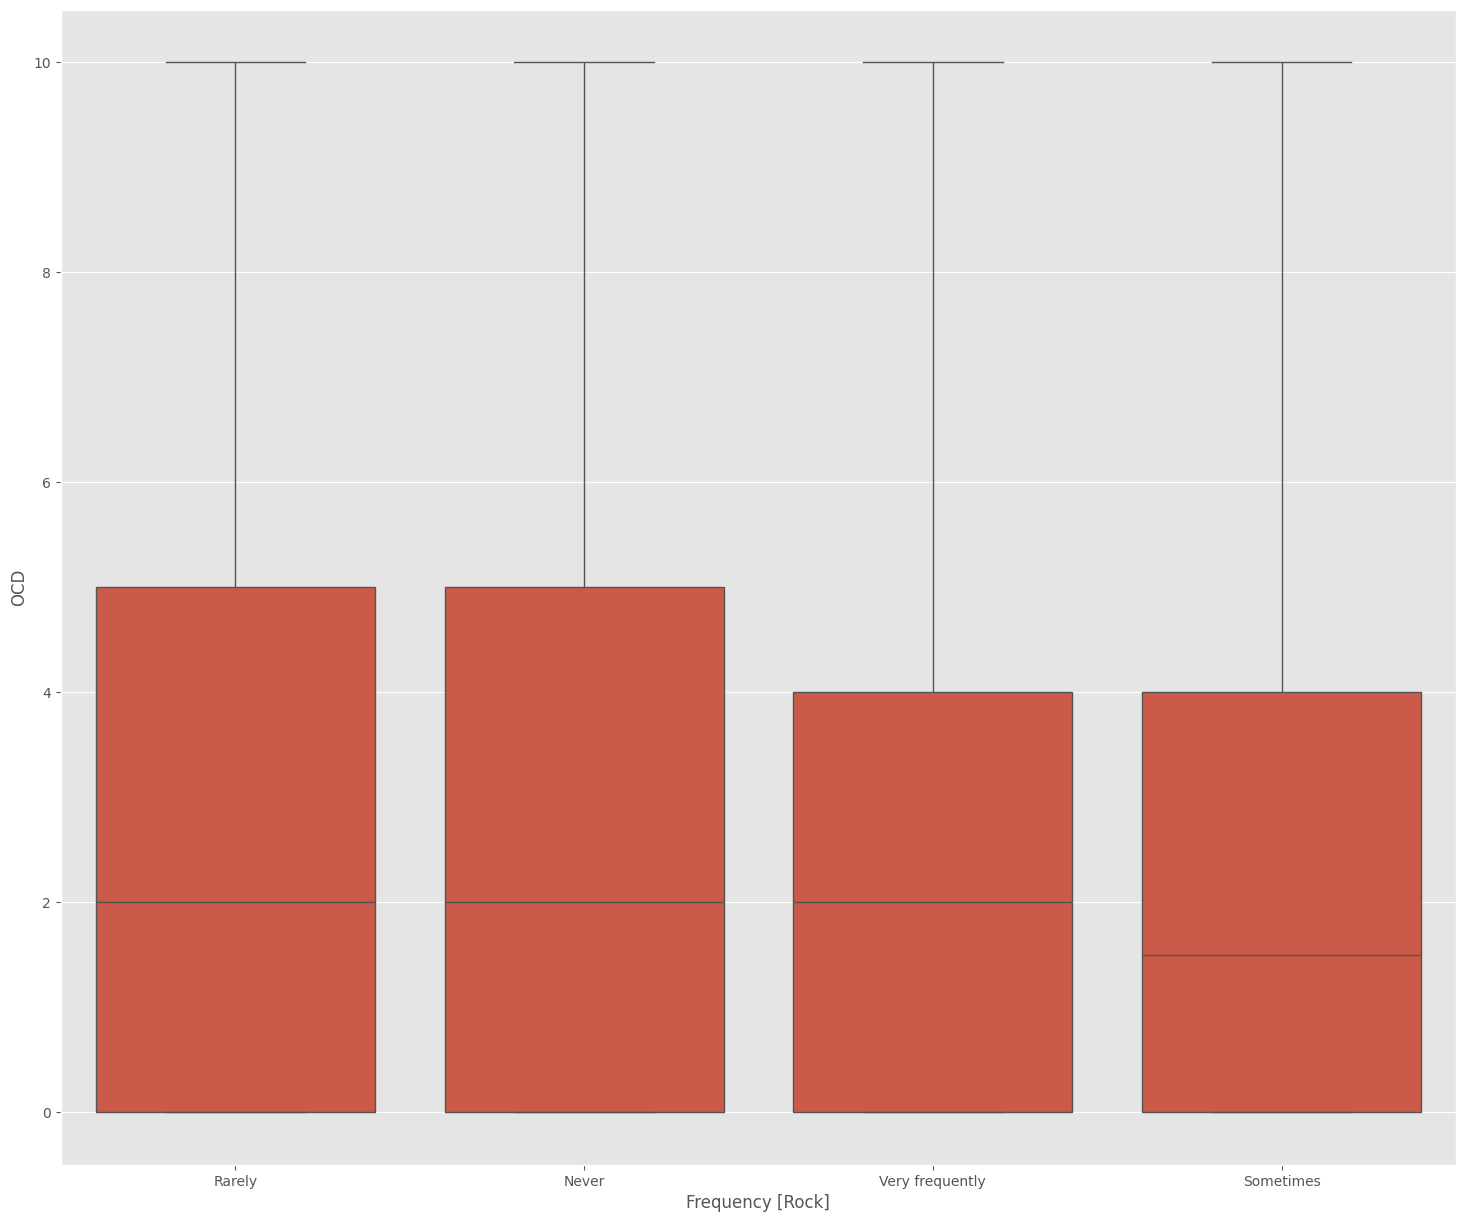

In [519]:
pyplot.figure(figsize=(18,15))
sns.boxplot(x='Frequency [Rock]', y='OCD',data=df)

<h1>ÁRBOL DE DECISIONES</h1>

In [520]:
#IMPORTS
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [521]:
df.shape

(718, 34)

In [522]:
df.groupby('Anxiety').size()

Anxiety
0      34
1      28
2      44
3      65
4      54
5      59
6      83
7     120
8     113
9      53
10     65
dtype: int64

In [523]:
df.groupby('Depression').size()

Depression
0     81
1     40
2     89
3     58
4     58
5     55
6     87
7     94
8     76
9     37
10    43
dtype: int64

In [524]:
df.groupby('Insomnia').size()

Insomnia
0     148
1      80
2      84
3      68
4      58
5      55
6      60
7      59
8      49
9      25
10     32
dtype: int64

In [525]:
df.groupby('OCD').size()

OCD
0     242
1      93
2      93
3      63
4      48
5      53
6      33
7      30
8      29
9      14
10     20
dtype: int64

Text(0, 0.5, 'Cuenta')

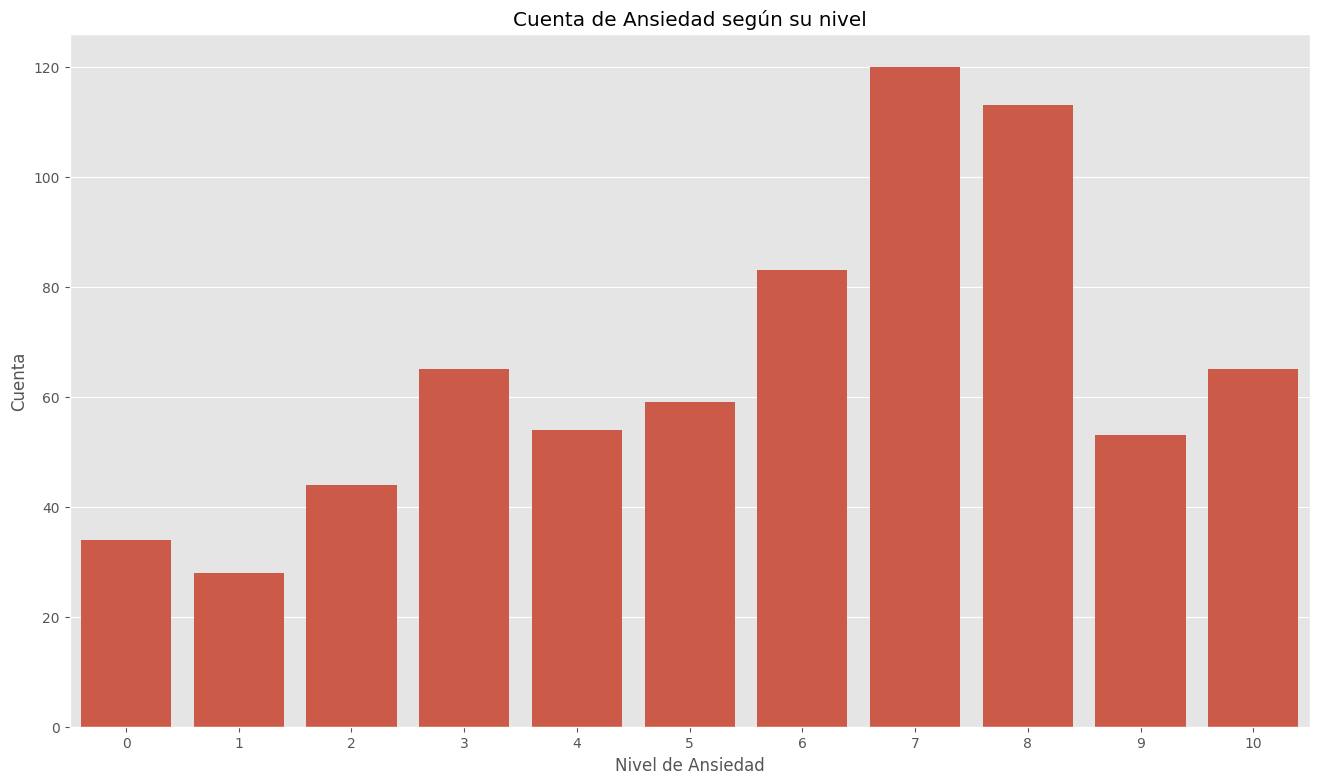

In [526]:
sns.countplot(x='Anxiety', data=df)
plt.title('Cuenta de Ansiedad según su nivel')
plt.xlabel("Nivel de Ansiedad")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

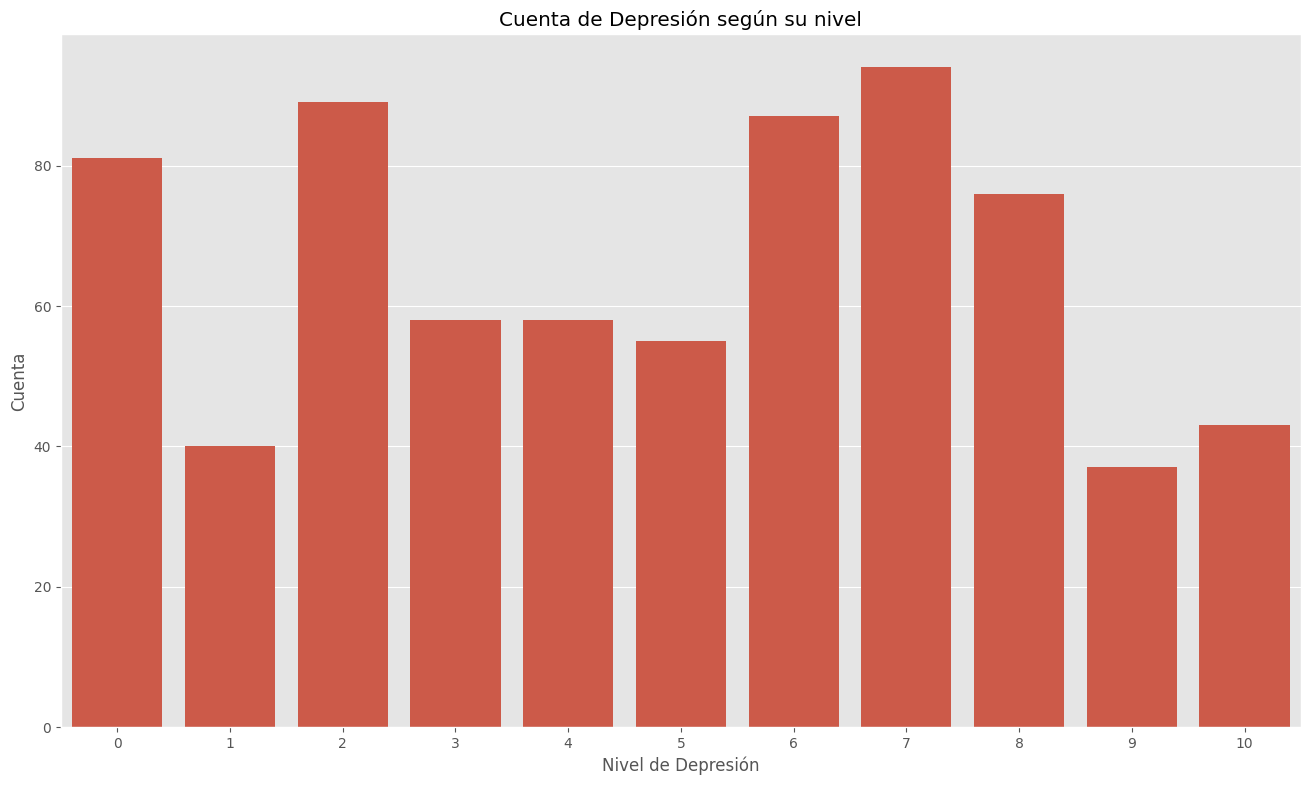

In [527]:
sns.countplot(x='Depression', data=df)
plt.title('Cuenta de Depresión según su nivel')
plt.xlabel("Nivel de Depresión")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

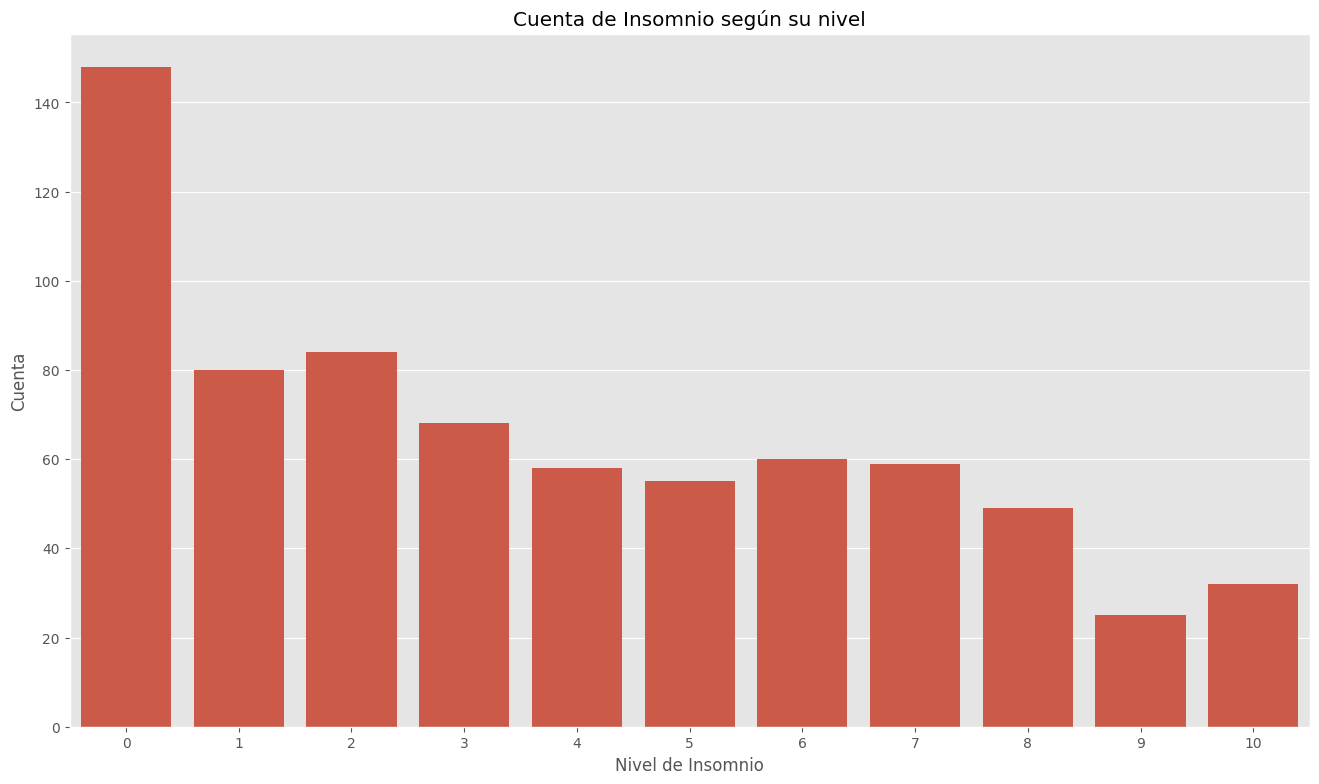

In [528]:
sns.countplot(x='Insomnia', data=df)
plt.title('Cuenta de Insomnio según su nivel')
plt.xlabel("Nivel de Insomnio")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

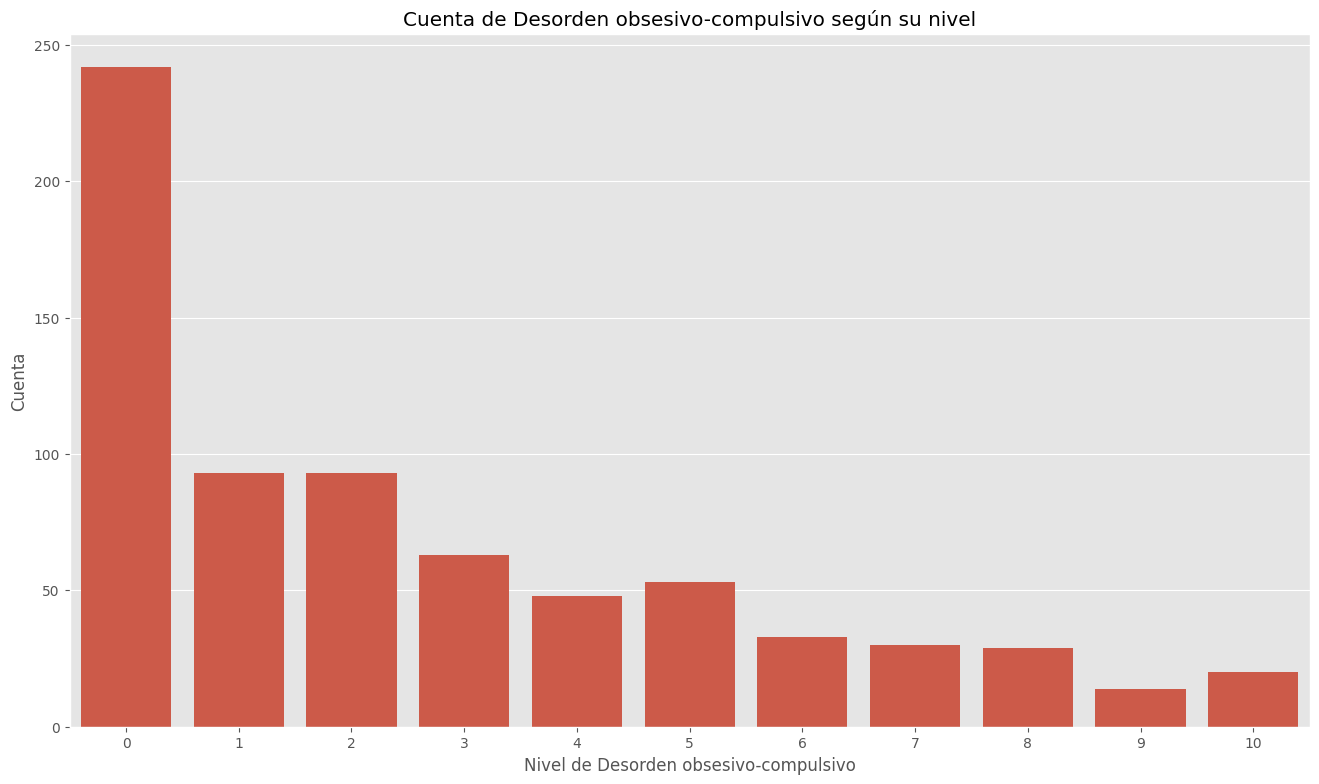

In [529]:
sns.countplot(x='OCD', data=df)
plt.title('Cuenta de Desorden obsesivo-compulsivo según su nivel')
plt.xlabel("Nivel de Desorden obsesivo-compulsivo")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

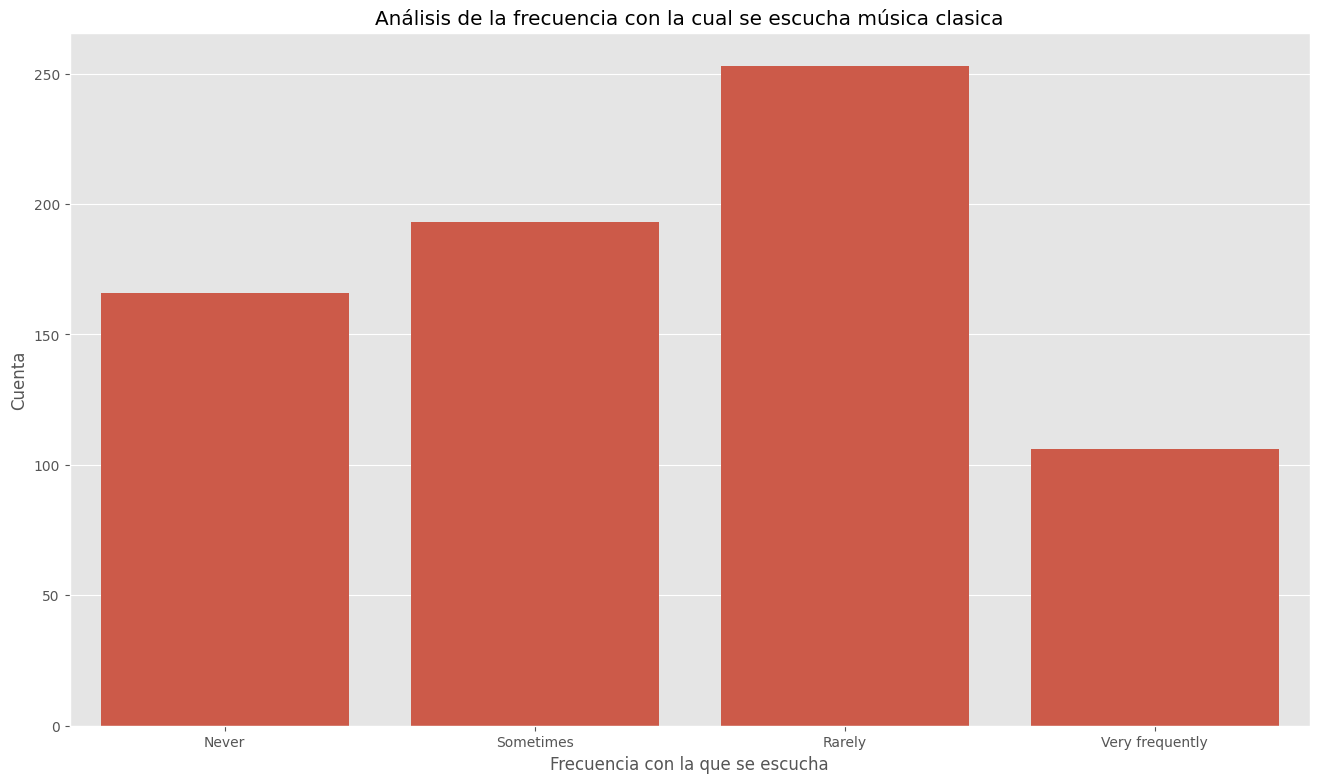

In [530]:
sns.countplot(x='Frequency [Classical]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha música clasica')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

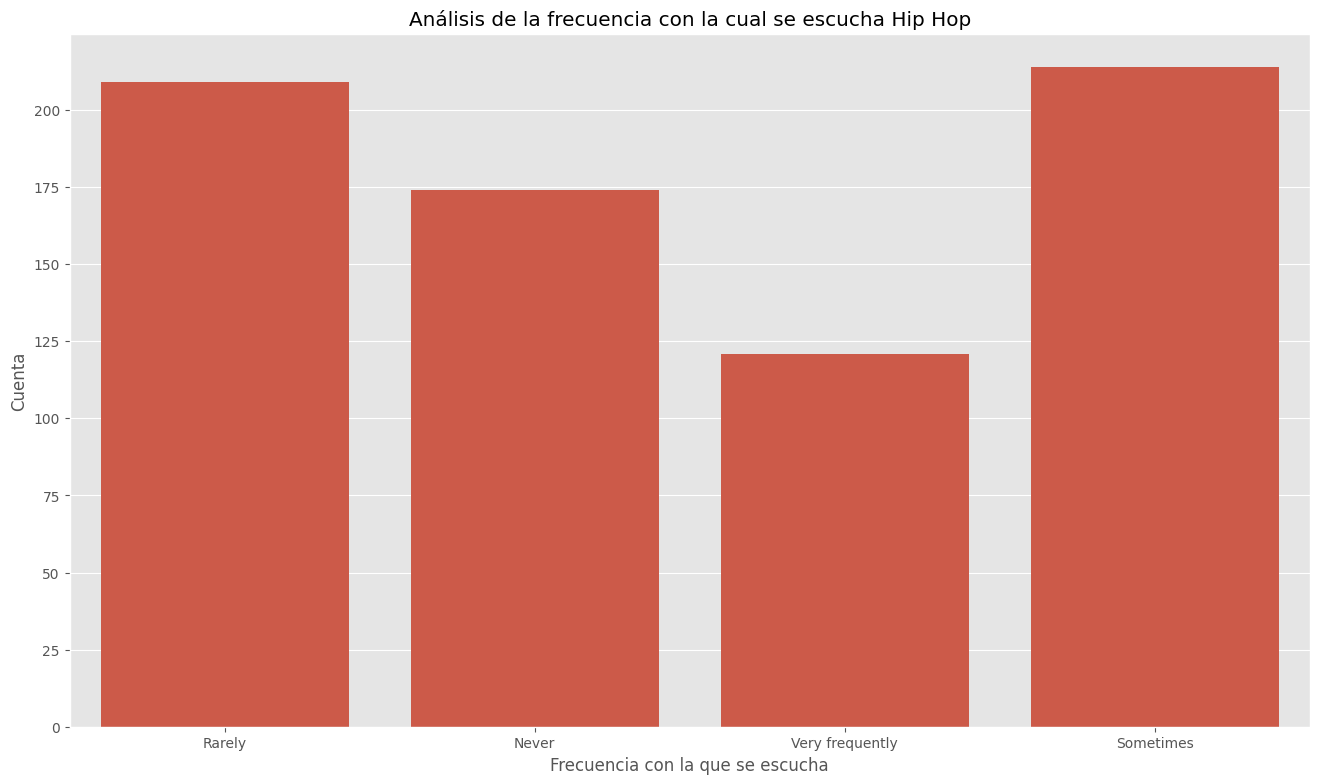

In [531]:
sns.countplot(x='Frequency [Hip hop]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha Hip Hop')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

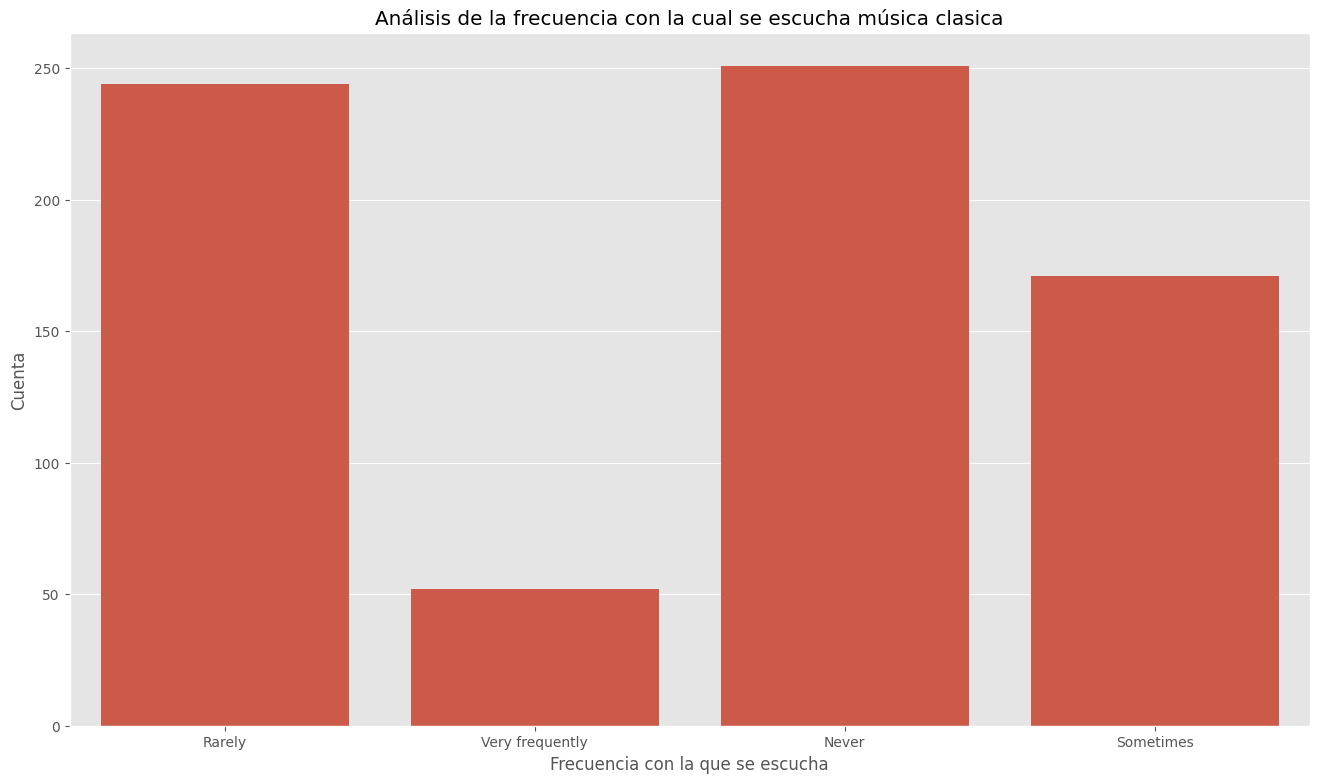

In [532]:
sns.countplot(x='Frequency [Jazz]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha música clasica')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

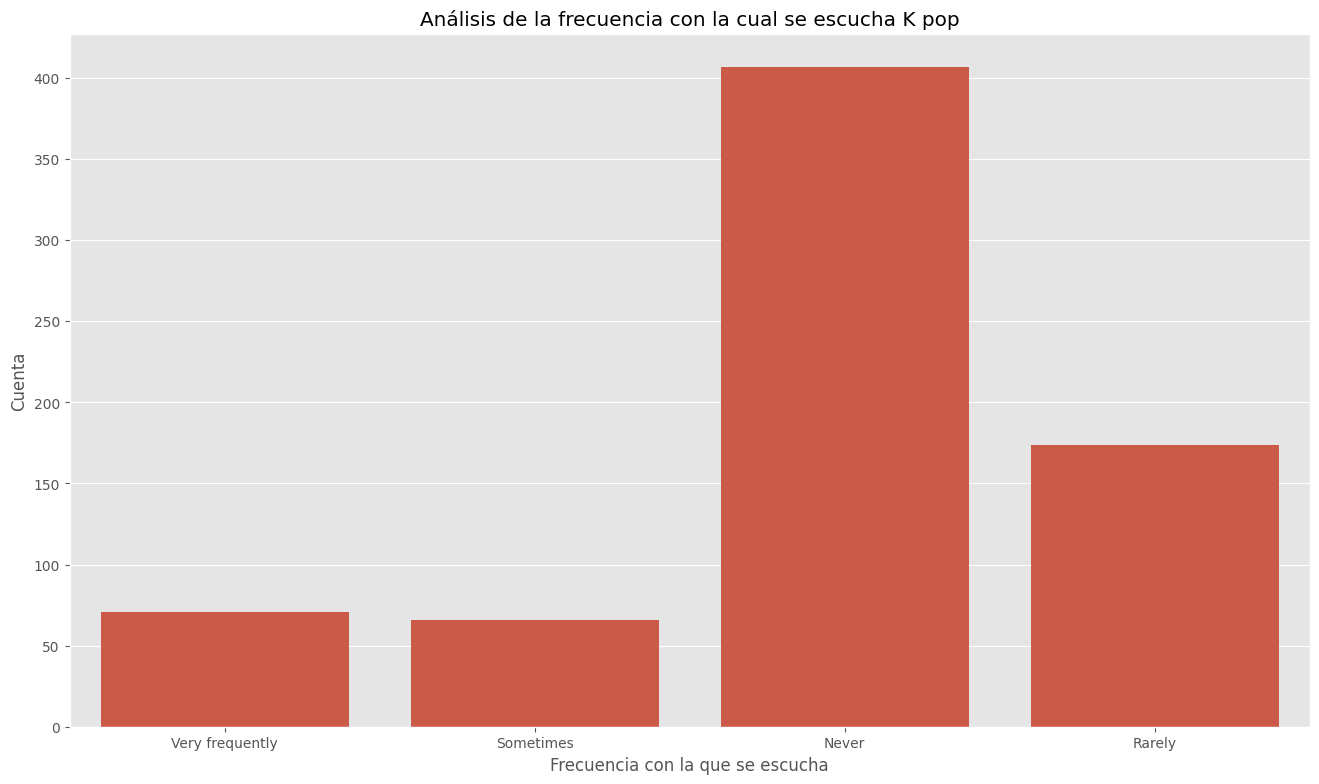

In [533]:
sns.countplot(x='Frequency [K pop]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha K pop')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

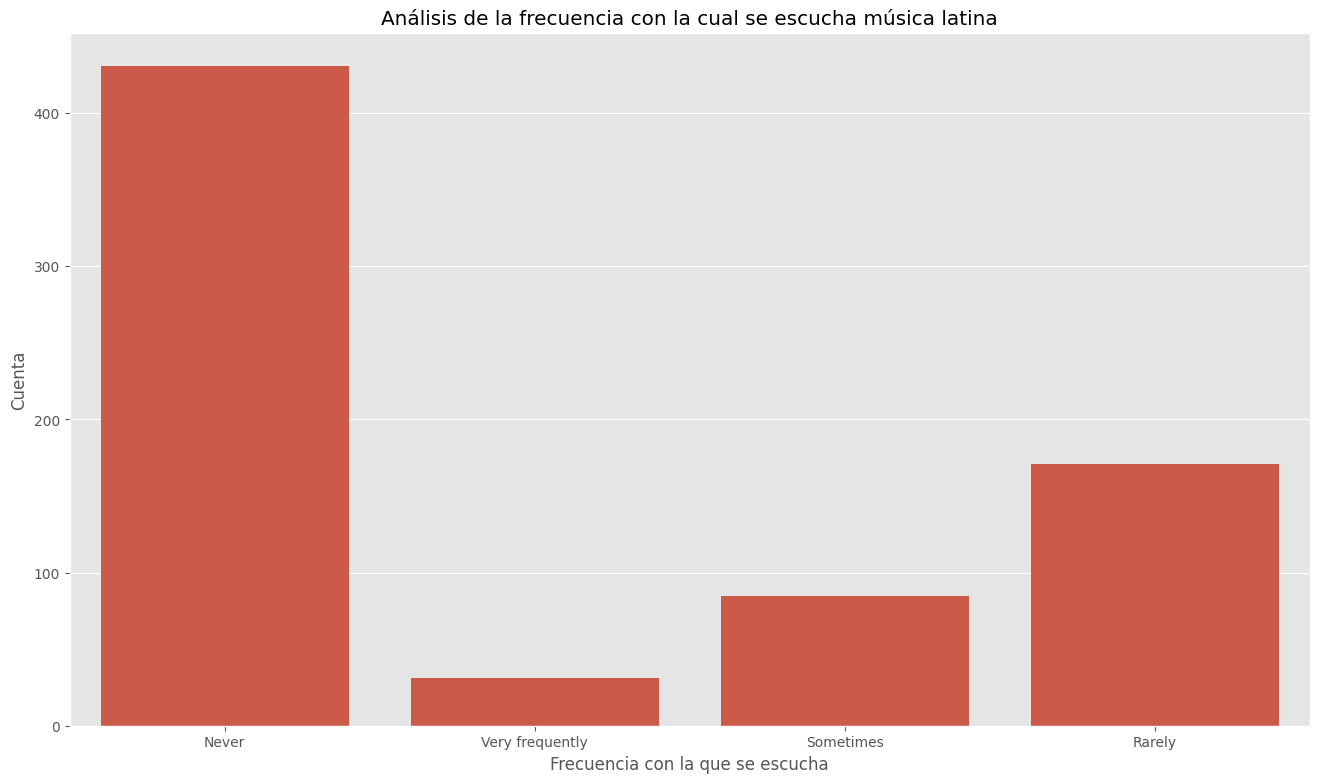

In [534]:
sns.countplot(x='Frequency [Latin]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha música latina')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

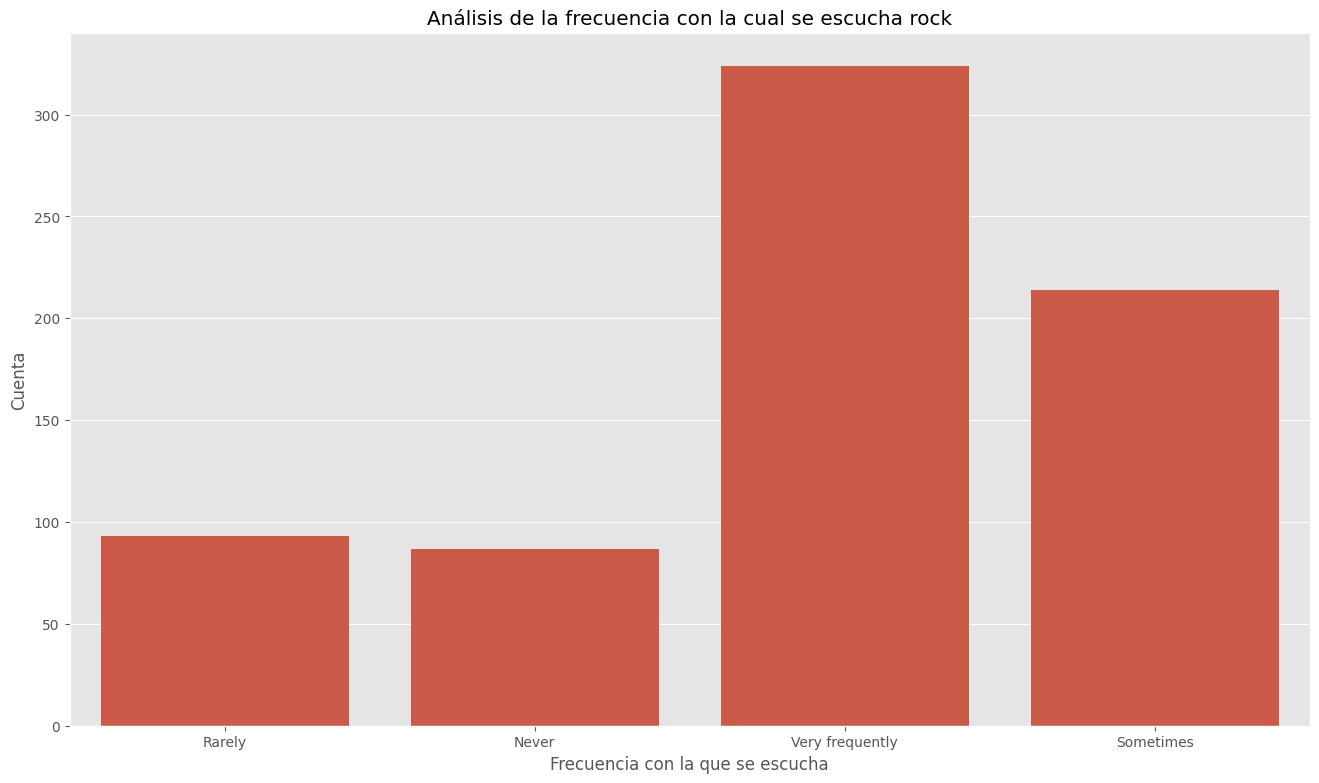

In [535]:
sns.countplot(x='Frequency [Rock]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha rock')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

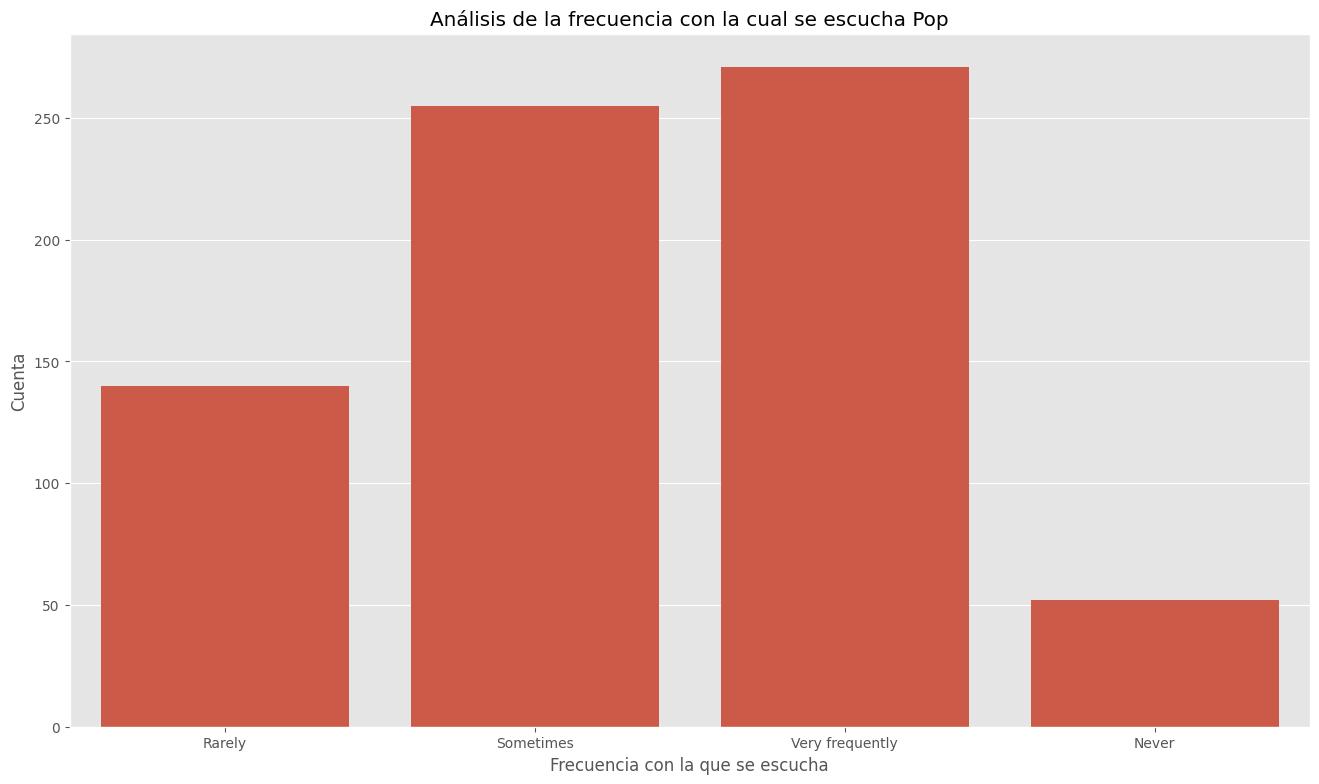

In [536]:
sns.countplot(x='Frequency [Pop]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha Pop')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

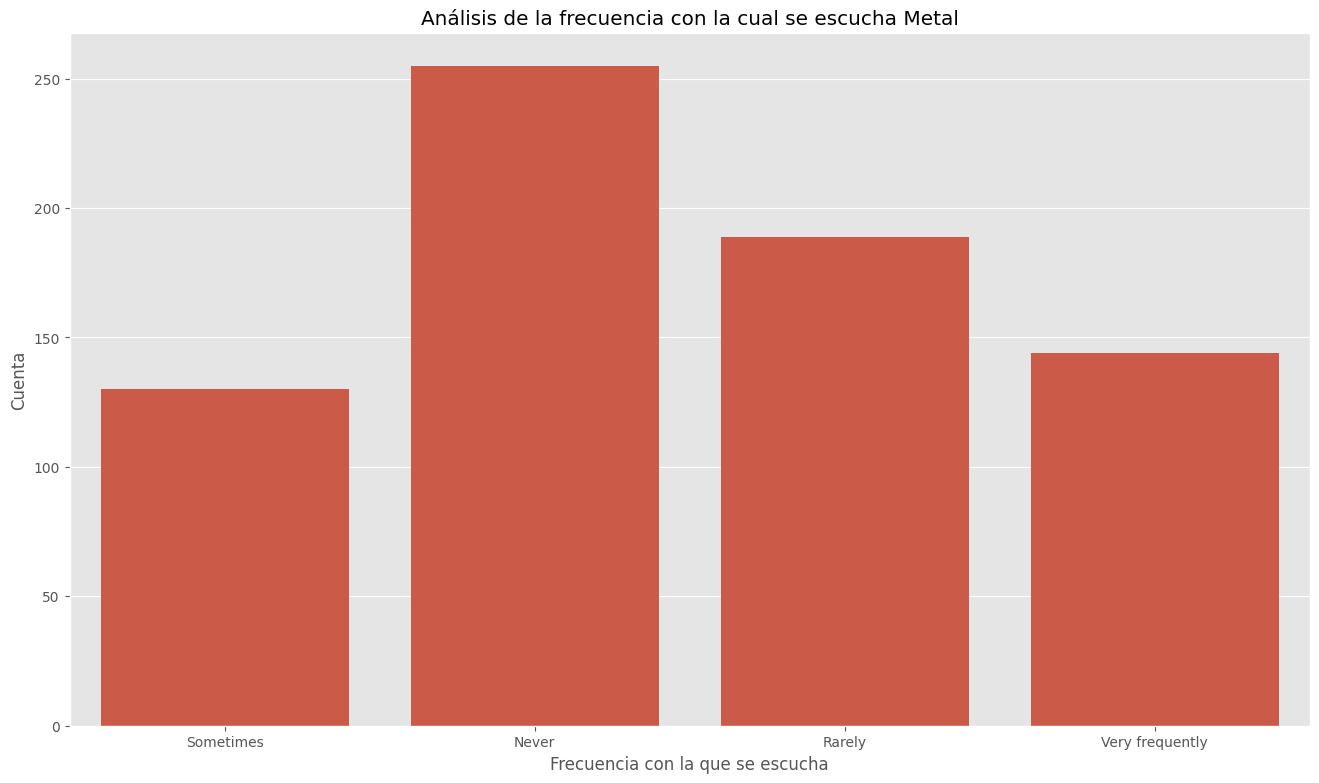

In [537]:
sns.countplot(x='Frequency [Metal]', data=df)
plt.title('Análisis de la frecuencia con la cual se escucha Metal')
plt.xlabel("Frecuencia con la que se escucha")
plt.ylabel("Cuenta")

In [538]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Age-binned'],
      dtype='object')

MAPEO DE DATOS

In [539]:
df.loc[df['Age'] <= 11, 'ageEncoded'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'ageEncoded'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 26), 'ageEncoded'] = 2
df.loc[(df['Age'] > 26) & (df['Age'] <= 59), 'ageEncoded'] = 3
df.loc[df['Age'] > 60, 'ageEncoded'] = 4

df.loc[df['Hours per day'] <= 0.5, 'hoursEncoded'] = 0
df.loc[(df['Hours per day'] > 0.5) & (df['Hours per day'] <= 1), 'hoursEncoded'] = 1
df.loc[(df['Hours per day'] > 1) & (df['Hours per day'] <= 3), 'hoursEncoded'] = 2
df.loc[(df['Hours per day'] > 3) & (df['Hours per day'] <= 5), 'hoursEncoded'] = 3
df.loc[df['Hours per day'] > 5, 'hoursEncoded'] = 4

df['instrumentalistEncoded'] = df['Instrumentalist'].map({
    'No':0,
    'Yes':1 
}).astype(int)

df['foreignlanguageEncoded'] = df['Foreign languages'].map({
    'No':0,
    'Yes':1 
}).astype(int)

df.loc[df['BPM'] <= 40, 'bpmEncoded'] = 0
df.loc[(df['BPM'] > 40) & (df['BPM'] <= 76), 'bpmEncoded'] = 1
df.loc[(df['BPM'] > 76) & (df['BPM'] <= 108), 'bpmEncoded'] = 2
df.loc[(df['BPM'] > 108) & (df['BPM'] <= 120), 'bpmEncoded'] = 3
df.loc[(df['BPM'] > 120) & (df['BPM'] <= 168), 'bpmEncoded'] = 4
df.loc[df['BPM'] > 168, 'bpmEncoded'] = 5

df['classicalEncoded'] = df['Frequency [Classical]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['countryEncoded'] = df['Frequency [Country]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['edmEncoded'] = df['Frequency [EDM]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['folkEncoded'] = df['Frequency [Folk]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['gospelEncoded'] = df['Frequency [Gospel]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['hiphopEncoded'] = df['Frequency [Hip hop]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['jazzEncoded'] = df['Frequency [Jazz]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['kpopEncoded'] = df['Frequency [K pop]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['latinEncoded'] = df['Frequency [Latin]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['lofiEncoded'] = df['Frequency [Lofi]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['metalEncoded'] = df['Frequency [Metal]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['popEncoded'] = df['Frequency [Pop]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['r&bEncoded'] = df['Frequency [R&B]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['rapEncoded'] = df['Frequency [Rap]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['rockEncoded'] = df['Frequency [Rock]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df['videogameEncoded'] = df['Frequency [Video game music]'].map({
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Very frequently':3
}).astype(int)

df.loc[df['Anxiety'] == 0, 'anxietyEncoded'] = 0
df.loc[(df['Anxiety'] >= 1) & (df['Anxiety'] <= 3), 'anxietyEncoded'] = 1
df.loc[(df['Anxiety'] > 3) & (df['Anxiety'] <= 6), 'anxietyEncoded'] = 2
df.loc[(df['Anxiety'] > 6) & (df['Anxiety'] <= 9), 'anxietyEncoded'] = 3
df.loc[df['Anxiety'] == 10, 'anxietyEncoded'] = 4

df.loc[df['Depression'] == 0, 'depressionEncoded'] = 0
df.loc[(df['Depression'] >= 1) & (df['Depression'] <= 3), 'depressionEncoded'] = 1
df.loc[(df['Depression'] > 3) & (df['Depression'] <= 6), 'depressionEncoded'] = 2
df.loc[(df['Depression'] > 6) & (df['Depression'] <= 9), 'depressionEncoded'] = 3
df.loc[df['Depression'] == 10, 'depressionEncoded'] = 4

df.loc[df['Insomnia'] == 0, 'insomniaEncoded'] = 0
df.loc[(df['Insomnia'] >= 1) & (df['Insomnia'] <= 3), 'insomniaEncoded'] = 1
df.loc[(df['Insomnia'] > 3) & (df['Insomnia'] <= 6), 'insomniaEncoded'] = 2
df.loc[(df['Insomnia'] > 6) & (df['Insomnia'] <= 9), 'insomniaEncoded'] = 3
df.loc[df['Insomnia'] == 10, 'insomniaEncoded'] = 4

df.loc[df['OCD'] == 0, 'ocdEncoded'] = 0
df.loc[(df['OCD'] >= 1) & (df['OCD'] <= 3), 'ocdEncoded'] = 1
df.loc[(df['OCD'] > 3) & (df['OCD'] <= 6), 'ocdEncoded'] = 2
df.loc[(df['OCD'] > 6) & (df['OCD'] <= 9), 'ocdEncoded'] = 3
df.loc[df['OCD'] == 10, 'ocdEncoded'] = 4

df['musiceffectsEncoded'] = df['Music effects'].map({
    'Worsen':0,
    'No effect':1,
    'Improve':2,
}).astype(int)


In [540]:
#df['ageEncoded'] = df['ageEncoded'].astype(int)
df['ageEncoded']

0      1.0
1      4.0
2      1.0
3      1.0
4      1.0
      ... 
713    1.0
714    1.0
715    2.0
716    2.0
717    3.0
Name: ageEncoded, Length: 718, dtype: float64

In [541]:
#Creando una copia del df

df_arbol = df
df_arbol.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Age-binned', 'ageEncoded', 'hoursEncoded',
       'instrumentalistEncoded', 'foreignlanguageEncoded', 'bpmEncoded',
       'classicalEncoded', 'countryEncoded', 'edmEncoded', 'folkEncoded',
       'gospelEncoded', 'hiphopEncoded', 'jazzEncoded', 'kpopEncoded',
       'latinEncoded', 'lofiEncoded', 'metalEncoded', 'popEncoded',
       'r&

In [542]:
drop_elements_anxiety = ['Timestamp','Age','Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 
       'Permissions', 'Age-binned','depressionEncoded', 'insomniaEncoded', 'ocdEncoded']

drop_elements_depression = ['Timestamp','Age','Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 
       'Permissions', 'Age-binned','anxietyEncoded', 'insomniaEncoded', 'ocdEncoded']

drop_elements_insomnia = ['Timestamp','Age','Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 
       'Permissions', 'Age-binned','depressionEncoded', 'anxietyEncoded', 'ocdEncoded']

drop_elements_ocd = ['Timestamp','Age','Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 
       'Permissions', 'Age-binned','depressionEncoded', 'insomniaEncoded', 'anxietyEncoded']

saludEncoded_anxiety = df_arbol.drop(drop_elements_anxiety, axis=1)
saludEncoded_depression = df_arbol.drop(drop_elements_depression, axis=1)
saludEncoded_insomnia = df_arbol.drop(drop_elements_insomnia, axis=1)
saludEncoded_ocd = df_arbol.drop(drop_elements_ocd, axis=1)

In [543]:
saludEncoded_anxiety[['ageEncoded','musiceffectsEncoded']].groupby(['ageEncoded'], as_index=True).agg(['mean', 'count', 'sum'])

musiceffectsEncoded           
                          mean count  sum
ageEncoded                               
0.0                   2.000000     1    2
1.0                   1.778261   230  409
2.0                   1.708333   288  492
3.0                   1.649425   174  287
4.0                   1.842105    19   35

In [544]:
saludEncoded_depression[['ageEncoded','musiceffectsEncoded']].groupby(['ageEncoded'], as_index=True).agg(['mean', 'count', 'sum'])

musiceffectsEncoded           
                          mean count  sum
ageEncoded                               
0.0                   2.000000     1    2
1.0                   1.778261   230  409
2.0                   1.708333   288  492
3.0                   1.649425   174  287
4.0                   1.842105    19   35

<h1>ANSIEDAD</h1>

In [545]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(saludEncoded_anxiety))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=30,
                                             min_samples_leaf=15,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(saludEncoded_anxiety):
        f_train = saludEncoded_anxiety.loc[train_fold] 
        f_valid = saludEncoded_anxiety.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['musiceffectsEncoded'], axis=1), 
                               y = f_train["musiceffectsEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['musiceffectsEncoded'], axis=1), 
                                y = f_valid["musiceffectsEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.652954
         2          0.549902
         3          0.537676
         4          0.576663
         5          0.543388
         6          0.516725
         7          0.541764
         8          0.562715
         9          0.578169
        10          0.575333
        11          0.571166
        12          0.576780
        13          0.576780
        14          0.572555
        15          0.575391
        16          0.572555
        17          0.576780
        18          0.572555
        19          0.576780
        20          0.576780
        21          0.572555
        22          0.571166
        23          0.571166


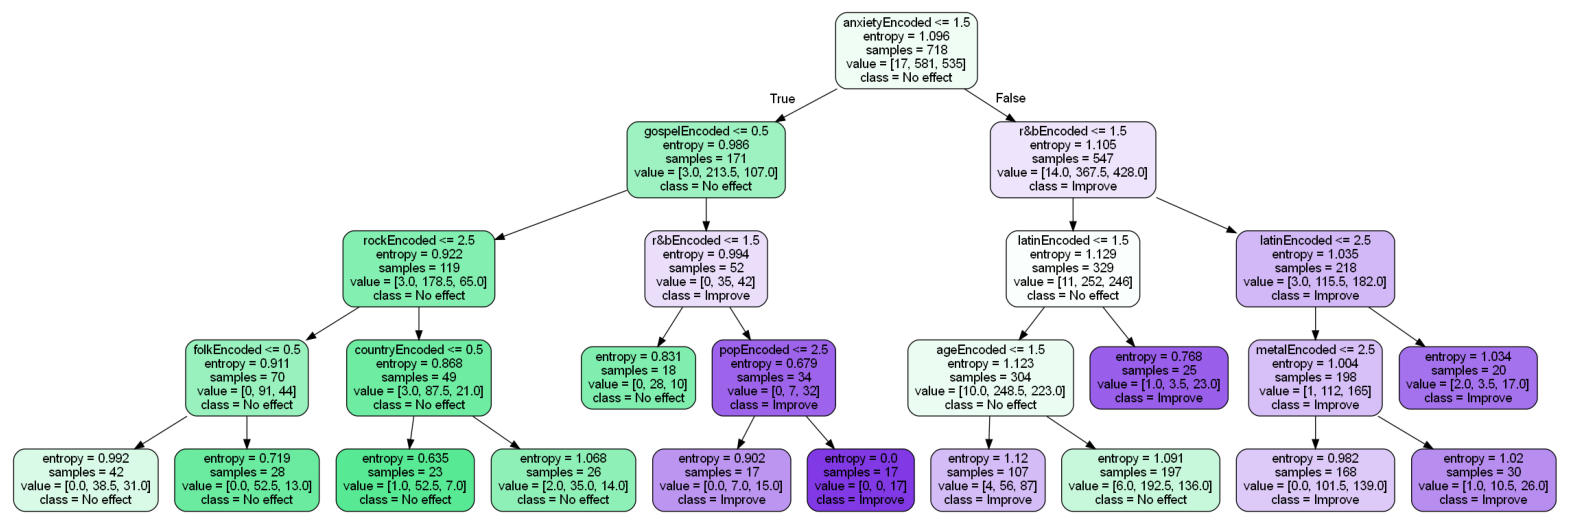

In [546]:
# Crear arrays de entrenamiento y las etiquetas
y_train = saludEncoded_anxiety['musiceffectsEncoded']
x_train = saludEncoded_anxiety.drop(['musiceffectsEncoded'], axis=1).values

# Crear el árbol de decisión con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=30,
                                            min_samples_leaf=15,
                                            max_depth=4,
                                            class_weight={0: 1.0, 1: 3.5, 2: 1.0})  # Ajusta según las clases presentes
decision_tree.fit(x_train, y_train)

# Exportar el modelo a un archivo .dot
with open(r"tree1.dot", 'w') as f:
    tree.export_graphviz(decision_tree,
                         out_file=f,
                         max_depth=7,
                         impurity=True,
                         feature_names=list(saludEncoded_anxiety.drop(['musiceffectsEncoded'], axis=1).columns),
                         class_names=['Worsen', 'No effect', 'Improve'],  # Ajusta según las clases presentes
                         rounded=True,
                         filled=True)

# Convertir el archivo .dot a .png para poder visualizarlo
try:
    check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])
    # Mostrar la imagen resultante
    img = mpimg.imread('tree1.png')
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("El comando 'dot' no se encontró. Asegúrate de que Graphviz esté instalado y que su directorio 'bin' esté en el PATH.")
except CalledProcessError as e:
    print("Ocurrió un error al intentar ejecutar 'dot':", e)



In [547]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

61.0


EJEMPLOS REALES DE PERSONAS QUE ME REGALARON ESOS DATOS PARA PODER PROBAR MI MODELO

In [549]:
x_test = pd.DataFrame(columns=('ageEncoded', 'hoursEncoded', 'instrumentalistEncoded',
       'foreignlanguageEncoded', 'bpmEncoded', 'classicalEncoded',
       'countryEncoded', 'edmEncoded', 'folkEncoded', 'gospelEncoded',
       'hiphopEncoded', 'jazzEncoded', 'kpopEncoded', 'latinEncoded',
       'lofiEncoded', 'metalEncoded', 'popEncoded', 'r&bEncoded', 'rapEncoded',
       'rockEncoded', 'videogameEncoded', 'anxietyEncoded',
       'musiceffectsEncoded'))
x_test.loc[0] = (2,2,0,1,2,0,0,0,1,3,1,1,0,1,0,0,1,1,1,2,0,2,2)
y_pred = decision_tree.predict(x_test.drop(['musiceffectsEncoded'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['musiceffectsEncoded'], axis = 1))
print("Probabilidad de Acierto: " + str(y_proba[0][y_pred]* 100)+"%")

Prediccion: [1]
Probabilidad de Acierto: [57.54857997]%


c:\Users\LENOVO\miniconda3\envs\data_analytics\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\data_analytics\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [550]:
x_test = pd.DataFrame(columns=('ageEncoded', 'hoursEncoded', 'instrumentalistEncoded',
       'foreignlanguageEncoded', 'bpmEncoded', 'classicalEncoded',
       'countryEncoded', 'edmEncoded', 'folkEncoded', 'gospelEncoded',
       'hiphopEncoded', 'jazzEncoded', 'kpopEncoded', 'latinEncoded',
       'lofiEncoded', 'metalEncoded', 'popEncoded', 'r&bEncoded', 'rapEncoded',
       'rockEncoded', 'videogameEncoded', 'anxietyEncoded',
       'musiceffectsEncoded'))
x_test.loc[0] = (2,2,0,0,3,0,0,0,1,2,1,0,0,3,0,0,1,1,1,3,0,3,2)
y_pred = decision_tree.predict(x_test.drop(['musiceffectsEncoded'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['musiceffectsEncoded'], axis = 1))
print("Probabilidad de Acierto: " + str(y_proba[0][y_pred]* 100)+"%")

Prediccion: [2]
Probabilidad de Acierto: [83.63636364]%


c:\Users\LENOVO\miniconda3\envs\data_analytics\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\data_analytics\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<h1>DEPRESSION</h1>

In [551]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(saludEncoded_depression))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=30,
                                             min_samples_leaf=15,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(saludEncoded_depression):
        f_train = saludEncoded_depression.loc[train_fold] 
        f_valid = saludEncoded_depression.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['musiceffectsEncoded'], axis=1), 
                               y = f_train["musiceffectsEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['musiceffectsEncoded'], axis=1), 
                                y = f_valid["musiceffectsEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.405399
         2          0.470970
         3          0.429069
         4          0.455477
         5          0.498728
         6          0.497183
         7          0.513889
         8          0.511228
         9          0.519640
        10          0.523807
        11          0.523807
        12          0.523807
        13          0.521029
        14          0.516862
        15          0.521029
        16          0.521029
        17          0.522418
        18          0.518251
        19          0.523807
        20          0.522418
        21          0.519640
        22          0.523807
        23          0.521029


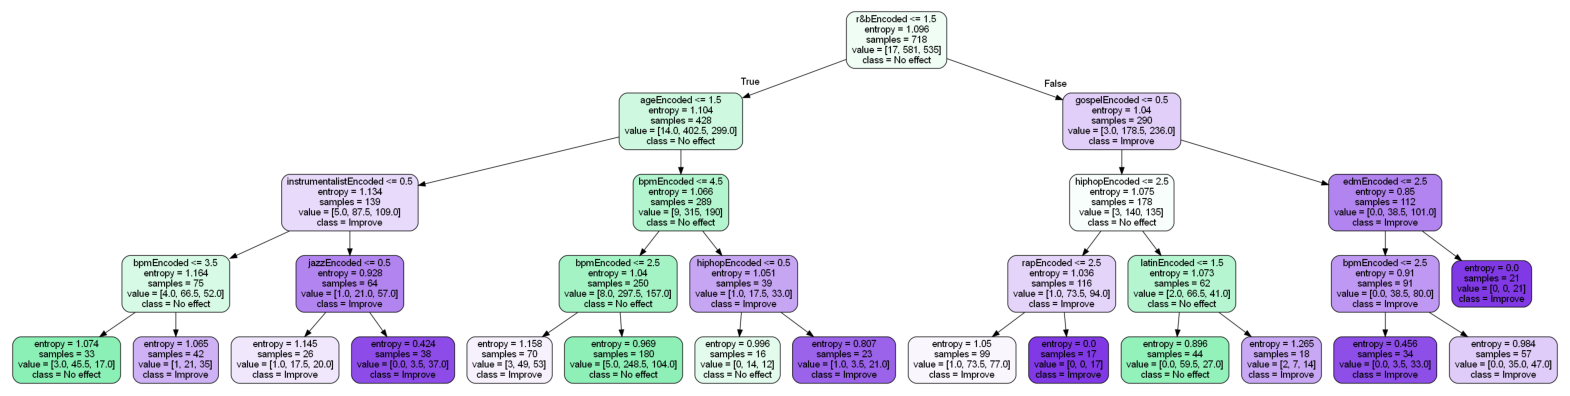

In [552]:
# Crear arrays de entrenamiento y las etiquetas
y_train = saludEncoded_depression['musiceffectsEncoded']
x_train = saludEncoded_depression.drop(['musiceffectsEncoded'], axis=1).values

# Crear el árbol de decisión con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=30,
                                            min_samples_leaf=15,
                                            max_depth=4,
                                            class_weight={0: 1.0, 1: 3.5, 2: 1.0})  # Ajusta según las clases presentes
decision_tree.fit(x_train, y_train)

# Exportar el modelo a un archivo .dot
with open(r"tree2.dot", 'w') as f:
    tree.export_graphviz(decision_tree,
                         out_file=f,
                         max_depth=7,
                         impurity=True,
                         feature_names=list(saludEncoded_depression.drop(['musiceffectsEncoded'], axis=1).columns),
                         class_names=['Worsen', 'No effect', 'Improve'],  # Ajusta según las clases presentes
                         rounded=True,
                         filled=True)

# Convertir el archivo .dot a .png para poder visualizarlo
try:
    check_call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png'])
    # Mostrar la imagen resultante
    img = mpimg.imread('tree2.png')
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("El comando 'dot' no se encontró. Asegúrate de que Graphviz esté instalado y que su directorio 'bin' esté en el PATH.")
except CalledProcessError as e:
    print("Ocurrió un error al intentar ejecutar 'dot':", e)

In [553]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

66.85


<h1>INSOMNIA</h1>

In [554]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(saludEncoded_insomnia))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=30,
                                             min_samples_leaf=15,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(saludEncoded_insomnia):
        f_train = saludEncoded_insomnia.loc[train_fold] 
        f_valid = saludEncoded_insomnia.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['musiceffectsEncoded'], axis=1), 
                               y = f_train["musiceffectsEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['musiceffectsEncoded'], axis=1), 
                                y = f_valid["musiceffectsEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.454010
         2          0.457081
         3          0.484624
         4          0.498572
         5          0.490473
         6          0.501428
         7          0.504245
         8          0.515473
         9          0.526663
        10          0.523885
        11          0.523885
        12          0.523885
        13          0.526663
        14          0.522496
        15          0.523885
        16          0.525274
        17          0.525274
        18          0.526663
        19          0.523885
        20          0.523885
        21          0.523885
        22          0.525274
        23          0.526663


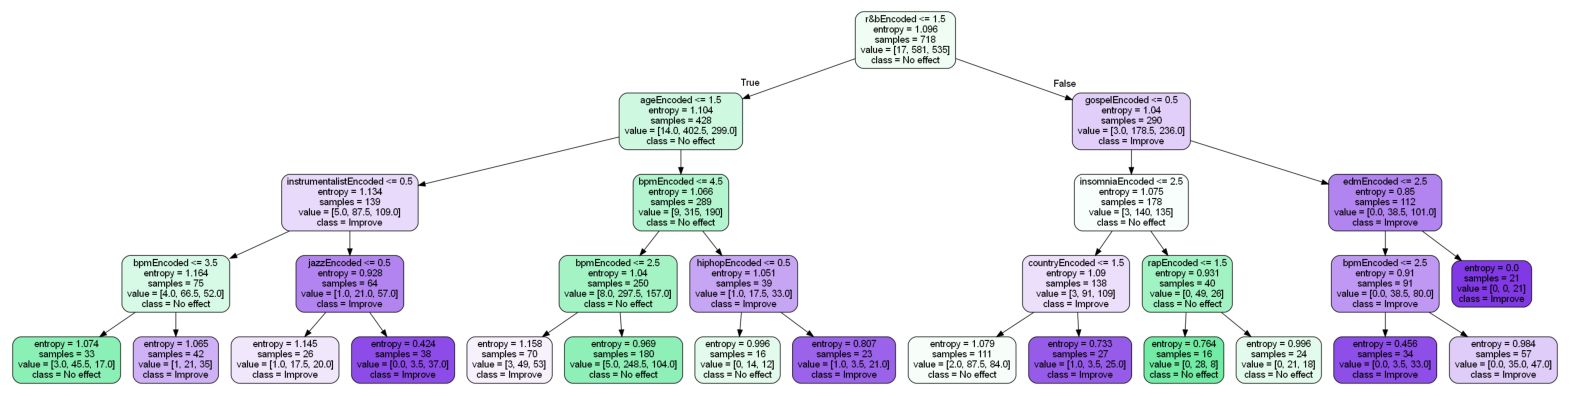

In [555]:
# Crear arrays de entrenamiento y las etiquetas
y_train = saludEncoded_insomnia['musiceffectsEncoded']
x_train = saludEncoded_insomnia.drop(['musiceffectsEncoded'], axis=1).values

# Crear el árbol de decisión con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=30,
                                            min_samples_leaf=15,
                                            max_depth=4,
                                            class_weight={0: 1.0, 1: 3.5, 2: 1.0})  # Ajusta según las clases presentes
decision_tree.fit(x_train, y_train)

# Exportar el modelo a un archivo .dot
with open(r"tree3.dot", 'w') as f:
    tree.export_graphviz(decision_tree,
                         out_file=f,
                         max_depth=7,
                         impurity=True,
                         feature_names=list(saludEncoded_insomnia.drop(['musiceffectsEncoded'], axis=1).columns),
                         class_names=['Worsen', 'No effect', 'Improve'],  # Ajusta según las clases presentes
                         rounded=True,
                         filled=True)

# Convertir el archivo .dot a .png para poder visualizarlo
try:
    check_call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png'])
    # Mostrar la imagen resultante
    img = mpimg.imread('tree3.png')
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("El comando 'dot' no se encontró. Asegúrate de que Graphviz esté instalado y que su directorio 'bin' esté en el PATH.")
except CalledProcessError as e:
    print("Ocurrió un error al intentar ejecutar 'dot':", e)

In [556]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

58.36


<h1>OCD</h1>

In [557]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(saludEncoded_ocd))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=30,
                                             min_samples_leaf=15,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(saludEncoded_ocd):
        f_train = saludEncoded_ocd.loc[train_fold] 
        f_valid = saludEncoded_ocd.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['musiceffectsEncoded'], axis=1), 
                               y = f_train["musiceffectsEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['musiceffectsEncoded'], axis=1), 
                                y = f_valid["musiceffectsEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.454010
         2          0.457081
         3          0.455458
         4          0.501350
         5          0.507101
         6          0.495794
         7          0.504167
         8          0.514006
         9          0.525196
        10          0.523807
        11          0.526585
        12          0.523807
        13          0.529362
        14          0.527973
        15          0.523807
        16          0.526585
        17          0.523807
        18          0.522418
        19          0.525196
        20          0.522418
        21          0.529362
        22          0.523807
        23          0.526585


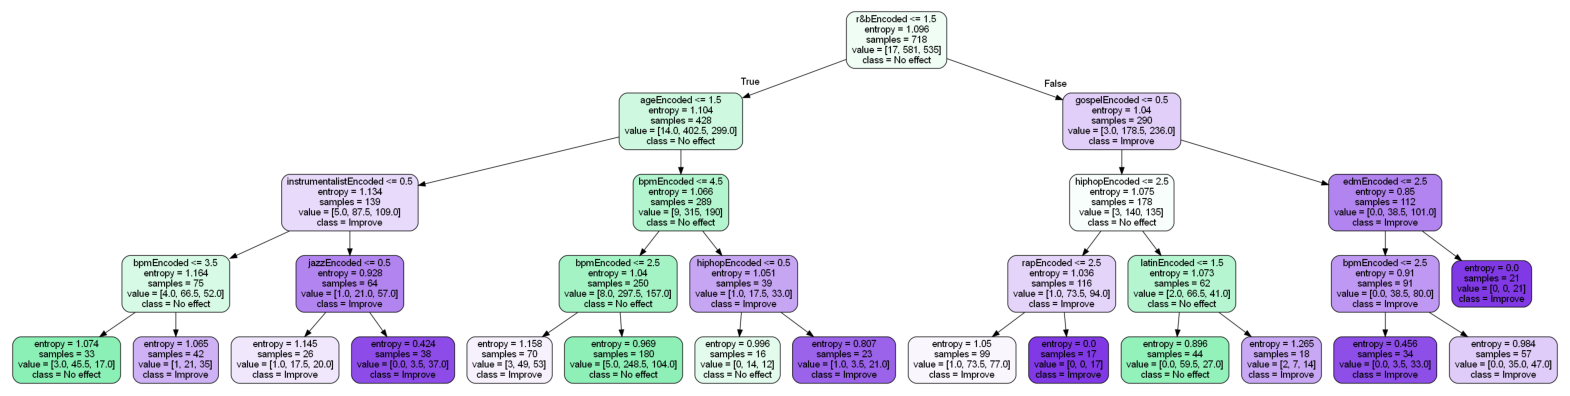

In [558]:
# Crear arrays de entrenamiento y las etiquetas
y_train = saludEncoded_ocd['musiceffectsEncoded']
x_train = saludEncoded_ocd.drop(['musiceffectsEncoded'], axis=1).values

# Crear el árbol de decisión con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=30,
                                            min_samples_leaf=15,
                                            max_depth=4,
                                            class_weight={0: 1.0, 1: 3.5, 2: 1.0})  # Ajusta según las clases presentes
decision_tree.fit(x_train, y_train)

# Exportar el modelo a un archivo .dot
with open(r"tree4.dot", 'w') as f:
    tree.export_graphviz(decision_tree,
                         out_file=f,
                         max_depth=7,
                         impurity=True,
                         feature_names=list(saludEncoded_ocd.drop(['musiceffectsEncoded'], axis=1).columns),
                         class_names=['Worsen', 'No effect', 'Improve'],  # Ajusta según las clases presentes
                         rounded=True,
                         filled=True)

# Convertir el archivo .dot a .png para poder visualizarlo
try:
    check_call(['dot', '-Tpng', 'tree4.dot', '-o', 'tree4.png'])
    # Mostrar la imagen resultante
    img = mpimg.imread('tree4.png')
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("El comando 'dot' no se encontró. Asegúrate de que Graphviz esté instalado y que su directorio 'bin' esté en el PATH.")
except CalledProcessError as e:
    print("Ocurrió un error al intentar ejecutar 'dot':", e)

In [559]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

66.85
